<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [181]:
# Utilice este espacio para escribir el código.

#Cargamos las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
np.set_printoptions(precision=3)
import time

In [182]:
clientes = pd.read_csv('data/datos_clientes.csv')
clientes.head(5)

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


(Utilice este espacio para describir su procedimiento)

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [183]:
# Utilice este espacio para escribir el código.
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_Cliente     200 non-null    int64  
 1   Genero         200 non-null    object 
 2   Edad           200 non-null    int64  
 3   Ingreso        200 non-null    float64
 4   Puntaje_Gasto  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [184]:
clientes.describe()

,Id_Cliente,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60624.446600,50.200000
std,57.879185,13.969007,26262.903416,25.823522
min,1.000000,18.000000,13458.020000,1.000000
25%,50.750000,28.750000,41512.787500,34.750000
50%,100.500000,36.000000,60777.960000,50.000000
75%,150.250000,49.000000,77143.865000,73.000000
max,200.000000,70.000000,138584.520000,99.000000


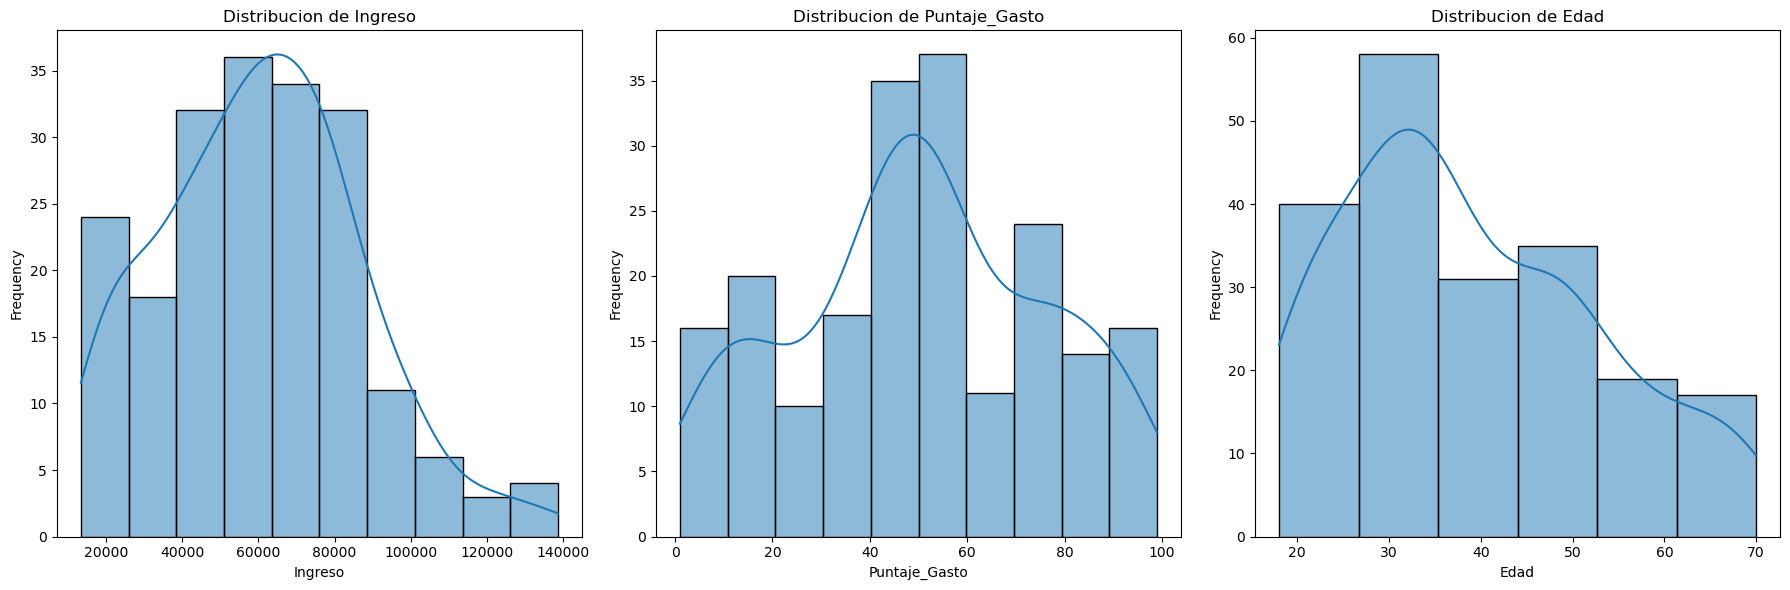

In [185]:

plt.figure(figsize=(18, 6))

# Histogram for Ingreso
plt.subplot(1, 3, 1)
sns.histplot(clientes['Ingreso'], kde=True, bins=10)
plt.title('Distribucion de Ingreso')
plt.xlabel('Ingreso')
plt.ylabel('Frequency')

# Histogram for Puntaje_Gasto
plt.subplot(1, 3, 2)
sns.histplot(clientes['Puntaje_Gasto'], kde=True, bins=10)
plt.title('Distribucion de Puntaje_Gasto')
plt.xlabel('Puntaje_Gasto')
plt.ylabel('Frequency')

# Histogram for Edad
plt.subplot(1, 3, 3)
sns.histplot(clientes['Edad'], kde=True, bins=6)
plt.title('Distribucion de Edad')
plt.xlabel('Edad')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

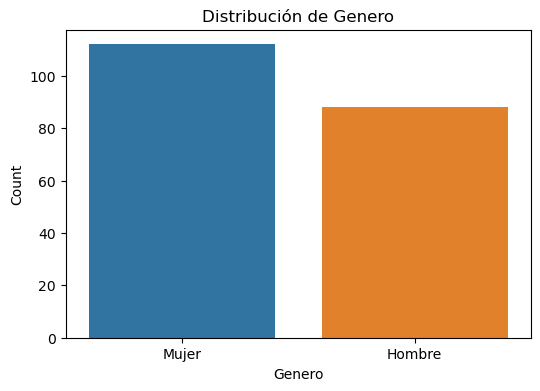

In [186]:
plt.figure(figsize=(6, 4))

# Bar plot for Genero
sns.countplot(clientes, x='Genero')
plt.title('Distribución de Genero')
plt.xlabel('Genero')
plt.ylabel('Count')

plt.show()

In [187]:
grouped_stats_gender = clientes.groupby('Genero').agg({
    'Edad': ['mean', 'std', 'min', 'max'],
    'Ingreso': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max']
})

grouped_stats_gender.T

Genero                     Hombre          Mujer
Edad          mean      39.806818      38.098214
              std       15.514812      12.644095
              min       18.000000      18.000000
              max       70.000000      68.000000
Ingreso       mean   62126.660455   59444.135714
              std    26765.492953   25920.459216
              min    13458.020000   15766.840000
              max   138584.520000  126685.780000
Puntaje_Gasto mean      48.511364      51.526786
              std       27.896770      24.114950
              min        1.000000       5.000000
              max       97.000000      99.000000

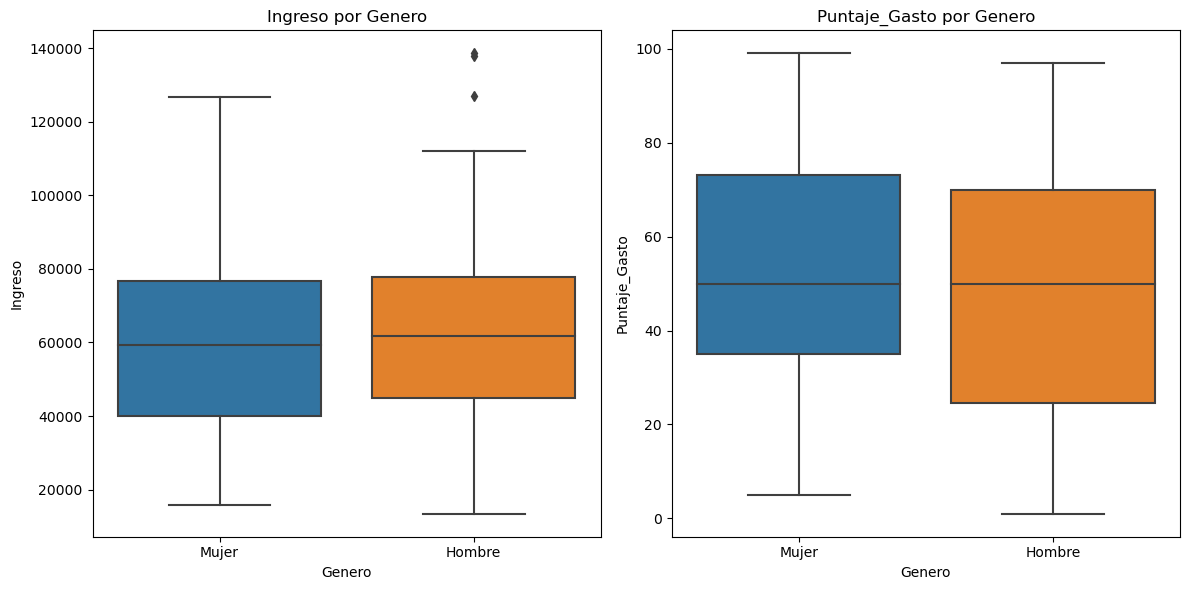

In [188]:
# Plotting Ingreso by Edad and Genero
plt.figure(figsize=(12, 6))

# Boxplot for Ingreso by Genero
plt.subplot(1, 2, 1)
sns.boxplot(clientes, x='Genero', y='Ingreso')
plt.title('Ingreso por Genero')

# Boxplot for Puntaje_Gasto by Genero
plt.subplot(1, 2, 2)
sns.boxplot(clientes, x='Genero', y='Puntaje_Gasto')
plt.title('Puntaje_Gasto por Genero')

plt.tight_layout()
plt.show()

In [189]:
# Define the bins and labels
bins = [0, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age_Group' in the DataFrame
clientes['Grupo_Eta'] = pd.cut(clientes['Edad'], bins=bins, labels=labels, right=True)

# Display the first few rows of the DataFrame to check the new column
clientes.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Eta
0,1,Mujer,41,98115.05,39,35-44
1,2,Mujer,20,35458.14,75,18-24
2,3,Mujer,68,59872.08,55,65+
3,4,Hombre,63,48508.93,51,55-64
4,5,Mujer,31,44431.11,54,25-34


In [190]:
grouped_stats_age = clientes.groupby('Grupo_Eta').agg({
    'Ingreso': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max']
})

grouped_stats_age.T

Grupo_Eta                  18-24          25-34          35-44          45-54  \
Ingreso       mean  44454.795429   71157.328148   66957.096905   58786.491026   
              std   20378.208373   27885.788157   27722.049259   24276.268114   
              min   13458.020000   19003.520000   18797.160000   24402.320000   
              max   80360.650000  138584.520000  119534.680000  126685.780000   
Puntaje_Gasto mean     56.257143      63.166667      49.428571      36.230769   
              std      24.659258      24.283506      30.700078      16.261776   
              min       5.000000       1.000000       1.000000       4.000000   
              max      94.000000      97.000000      99.000000      59.000000   

Grupo_Eta                  55-64           65+  
Ingreso       mean  56357.093125  51420.789286  
              std   22351.828240  12686.437083  
              min   18434.740000  18437.210000  
              max   94049.490000  64156.370000  
Puntaje_Gasto mean     32.312500     46.714286  
              std      21.752299     11.431593  
              min       3.000000     14.000000  
              max      60.000000     59.000000

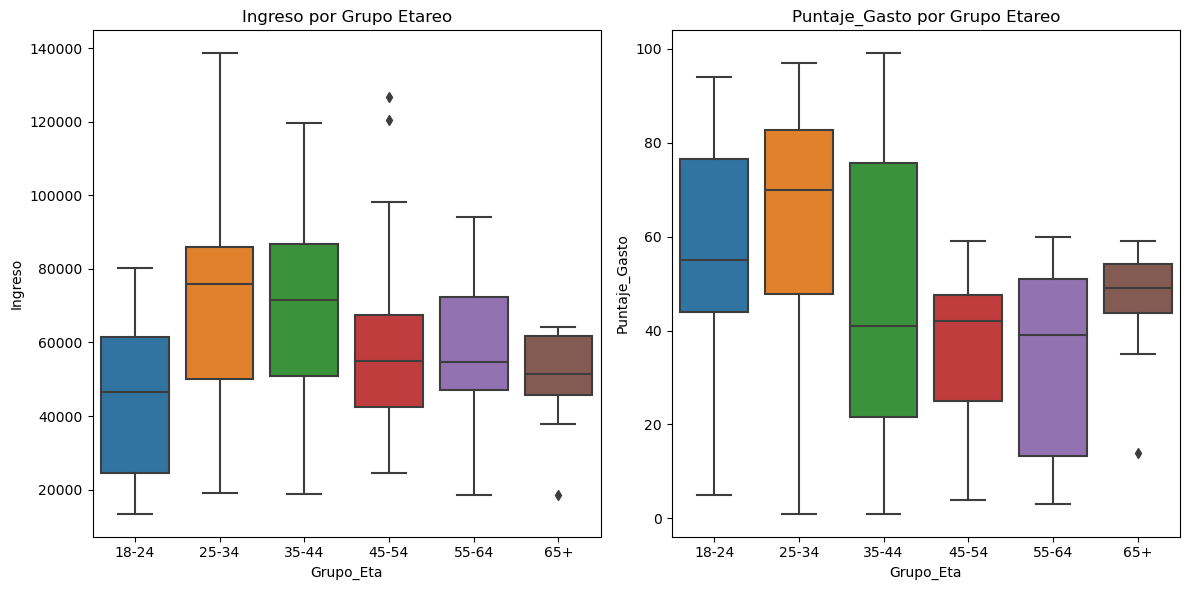

In [191]:
# Plotting Ingreso by Edad and Genero
plt.figure(figsize=(12, 6))

# Boxplot for Ingreso by Genero
plt.subplot(1, 2, 1)
sns.boxplot(clientes, x='Grupo_Eta', y='Ingreso')
plt.title('Ingreso por Grupo Etareo')

# Boxplot for Puntaje_Gasto by Genero
plt.subplot(1, 2, 2)
sns.boxplot(clientes, x='Grupo_Eta', y='Puntaje_Gasto')
plt.title('Puntaje_Gasto por Grupo Etareo')

plt.tight_layout()
plt.show()

In [192]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id_Cliente     200 non-null    int64   
 1   Genero         200 non-null    object  
 2   Edad           200 non-null    int64   
 3   Ingreso        200 non-null    float64 
 4   Puntaje_Gasto  200 non-null    int64   
 5   Grupo_Eta      200 non-null    category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 8.4+ KB


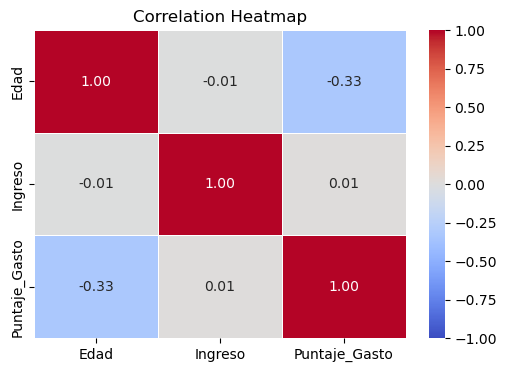

In [193]:
# Calculate the correlation matrix

# Select numeric columns (excluding categorical ones)
numeric_cols = clientes.select_dtypes(exclude=['object', 'category']).columns
cl_numeric = clientes[numeric_cols]
cl_numeric =  cl_numeric.iloc[:, 1:4]
corr_matrix = cl_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

(Utilice este espacio para describir su procedimiento)

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [194]:
# Utilice este espacio para escribir el código.
clientes.head(3)

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Eta
0,1,Mujer,41,98115.05,39,35-44
1,2,Mujer,20,35458.14,75,18-24
2,3,Mujer,68,59872.08,55,65+


In [195]:
Ing_Gas = clientes.iloc[:, 3:5]
Ing_Gas.head(5)

,Ingreso,Puntaje_Gasto
0,98115.05,39
1,35458.14,75
2,59872.08,55
3,48508.93,51
4,44431.11,54


In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Ing_Gas_scaled = pd.DataFrame(scaler.fit_transform(Ing_Gas), columns=['Ing_sc', 'Ptj_sc'])
Ing_Gas_scaled.head(3)                              

,Ing_sc,Ptj_sc
0,1.431094,-0.434801
1,-0.960650,0.962775
2,-0.028719,0.186343


In [197]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

dist_Ing_Gas = pdist(Ing_Gas, metric='euclidean')
Z_Ing_Gas = linkage(dist_Ing_Gas, method='ward')
dist_Ing_Gas_sc = pdist(Ing_Gas_scaled, metric='euclidean')
Z_Ing_Gas_sc = linkage(dist_Ing_Gas_sc, method='ward')

In [198]:
top_clusters = 10 # define top clusters to plot

In [199]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(Z, show_all=False):
    # Set the value of p: all clusters if show_all is True, or a specific number otherwise
    if show_all:
        p_value = len(Z) + 1 
        print("Dendograma incluye todos los posibles grupos (clusters)")
    else:
        p_value = top_clusters
        print(f"Dendograma incluye los primeros {p_value} grupos (clusters)")
        
    # Adjust the figure size for better readability
    fig, ax = plt.subplots(figsize=(20, 10))  # Increase the width and height for better readability

    # Plot the dendrogram with improved settings
    d = dendrogram(
        Z,
        show_leaf_counts=True,
        leaf_rotation=90,  # Rotate labels for better readability
        leaf_font_size=10,  # Adjust the font size for readability
        ax=ax,
        truncate_mode='lastp',  # Truncate the dendrogram if not showing all clusters
        p=p_value,  # Display all clusters or the specified number
        color_threshold=0.7 * max(Z[:, 2])  # Optional: color clusters below a distance threshold
    )

    # Set axis labels and customize ticks
    ax.set_xlabel('Observaciones', fontsize=14)
    ax.set_ylabel('Distancia', fontsize=14)
    ax.set_yticks(np.arange(0, max(Z[:, 2]), 1))  # Adjust y-ticks based on your data range
    plt.xticks(rotation=45)  # Rotate x-axis labels

    # Show the plot
    plt.show()

Dendograma incluye todos los posibles grupos (clusters)


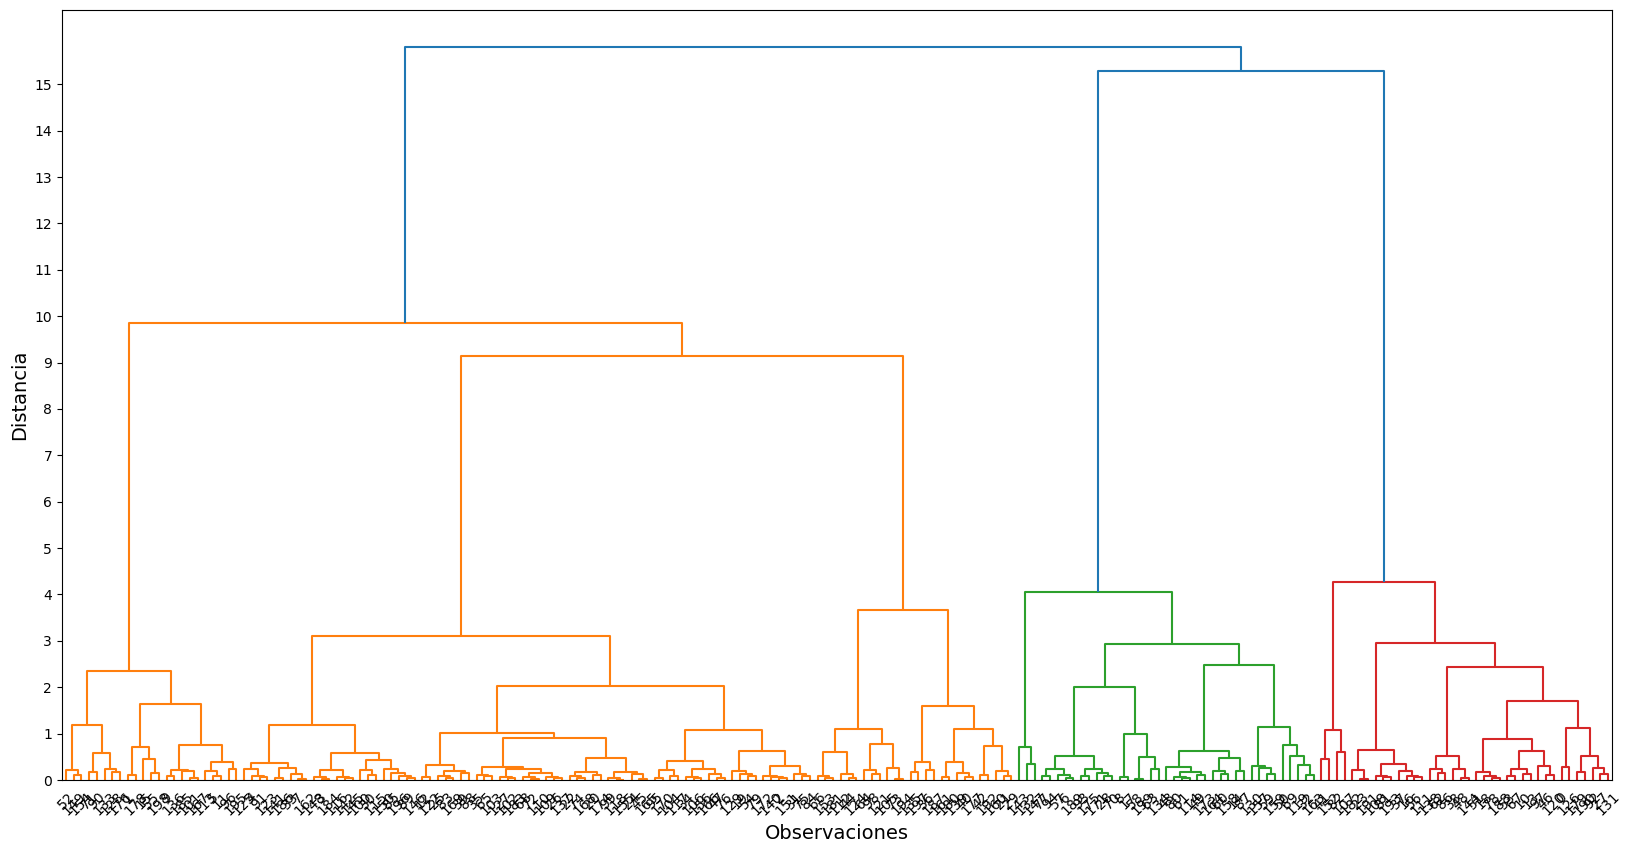

In [200]:
# Plot the dendrogram with the option to show all clusters
plot_dendrogram(Z_Ing_Gas_sc, show_all=True)  # Set show_all to True to plot all clusters

Dendograma incluye los primeros 10 grupos (clusters)


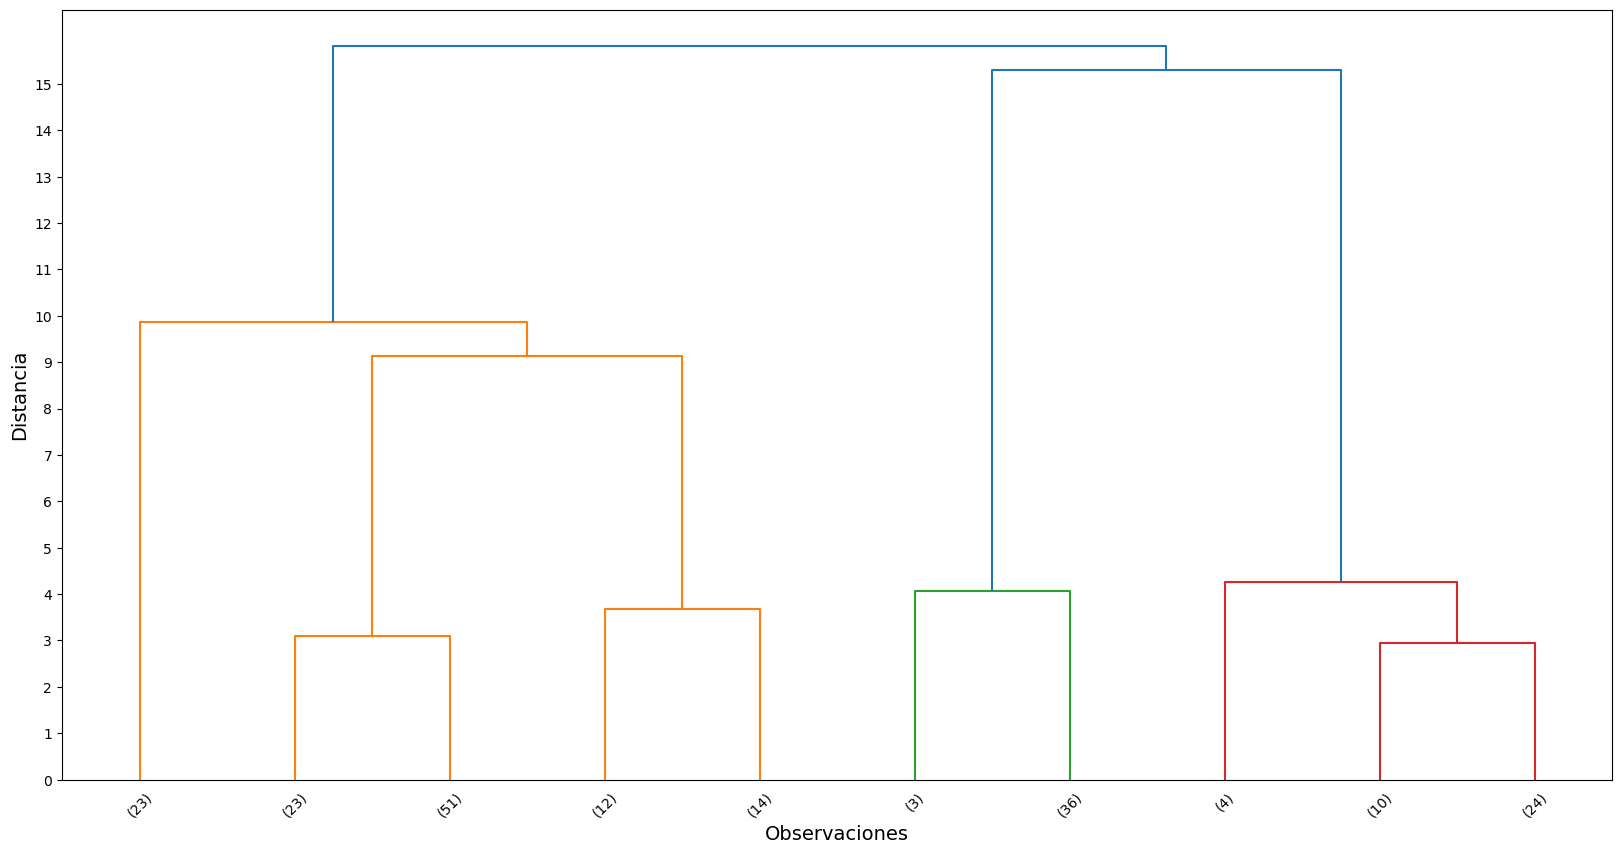

In [201]:
# Plot the dendrogram with the option to show all clusters
plot_dendrogram(Z_Ing_Gas_sc, show_all=False)  # Set show_all to True to plot all clusters

In [202]:
#top_clusters = 5
#start_time = time.time()
# Plot non standardized dendogram
#plot_dendrogram(Z_Ing_Gas, show_all=False)  
#end_time = time.time()

In [203]:
#elapsed_time = end_time - start_time
#print(f"Elapsed time: {elapsed_time:.2f} seconds")

(Utilice este espacio para describir su procedimiento)

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

Numero de grupos a una distancia 6: 5


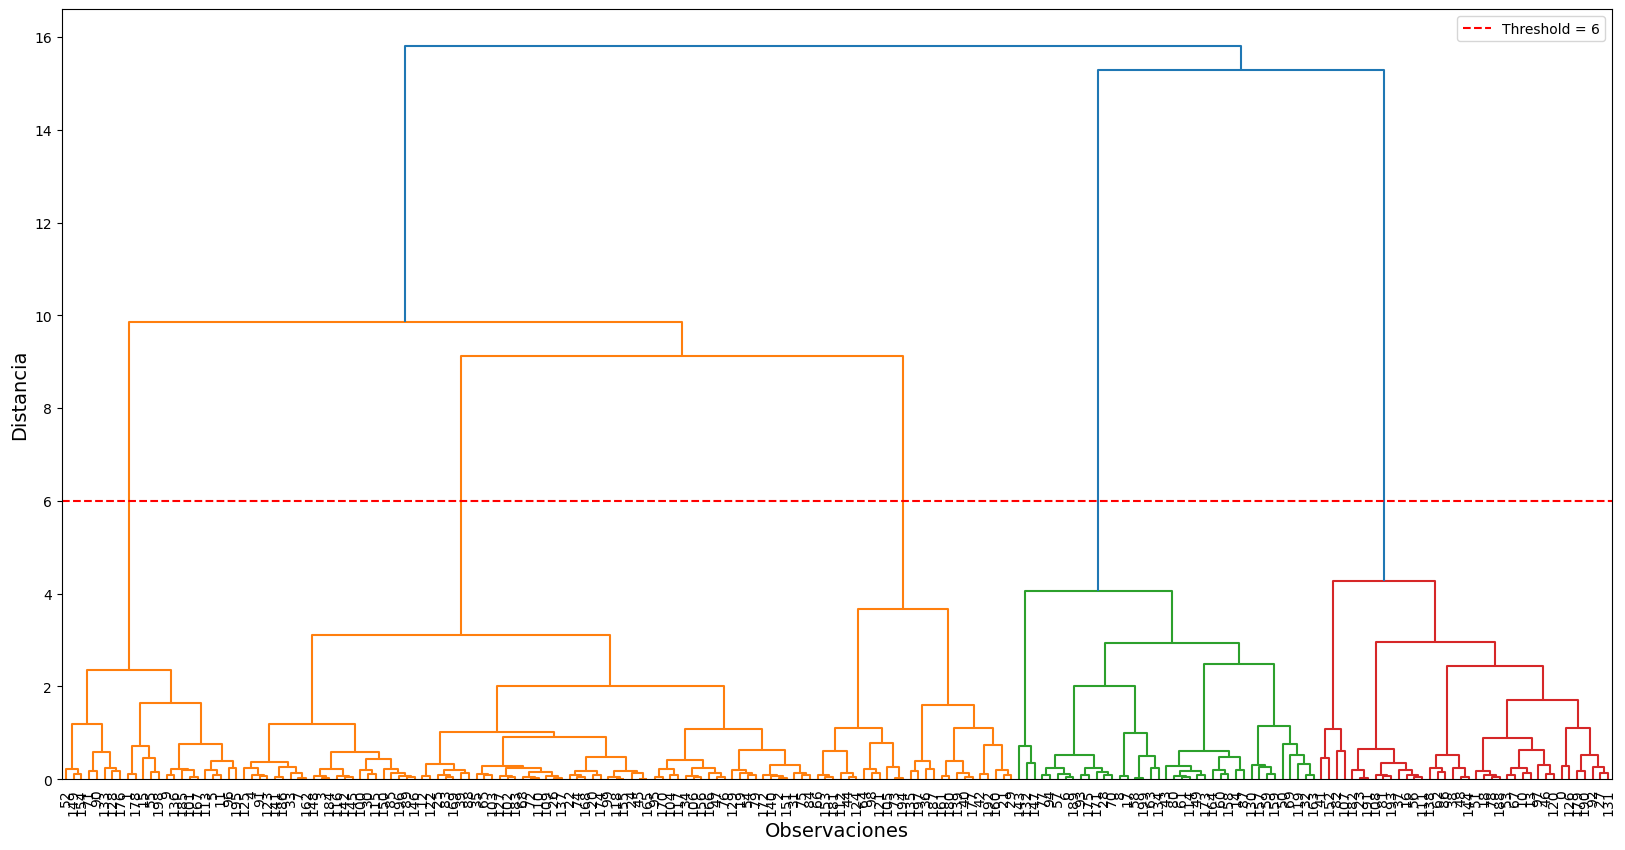

In [204]:
# Utilice este espacio para escribir el código
from scipy.cluster.hierarchy import fcluster

distance = 6 

# Use fcluster to assign cluster labels based on the distance threshold
cluster_labels = fcluster(Z_Ing_Gas_sc, t=distance, criterion='distance')

# Count the number of unique clusters formed
num_clusters = len(np.unique(cluster_labels))
print(f"Numero de grupos a una distancia {distance}: {num_clusters}")

# Optionally, add cluster labels to the DataFrame if needed
# df['Cluster'] = cluster_labels  # Uncomment and adjust if you have a DataFrame

# Plot the dendrogram with the distance threshold highlighted
fig, ax = plt.subplots(figsize=(20, 10))
d = dendrogram(Z_Ing_Gas_sc, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=10, ax=ax)
ax.axhline(y=distance, color='r', linestyle='--', label=f'Threshold = {distance}')  # Add threshold line
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_ylabel('Distancia', fontsize=14)
plt.legend()
plt.show()

In [205]:
# Plotting clusters formed using fcluster
def plot_clusters_fcluster(df, cluster_labels):
    plt.figure(figsize=(12, 8))
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        plt.scatter(
            df.loc[cluster_labels == cluster, 'Ingreso'],
            df.loc[cluster_labels == cluster, 'Puntaje_Gasto'],
            label=f'Cluster {cluster}',
            s=50, alpha=0.7
        )
    plt.title('Clusters using fcluster Method')
    plt.xlabel('Ingreso')
    plt.ylabel('Puntaje_Gasto')
    plt.grid(True)
    plt.legend()
    plt.show()

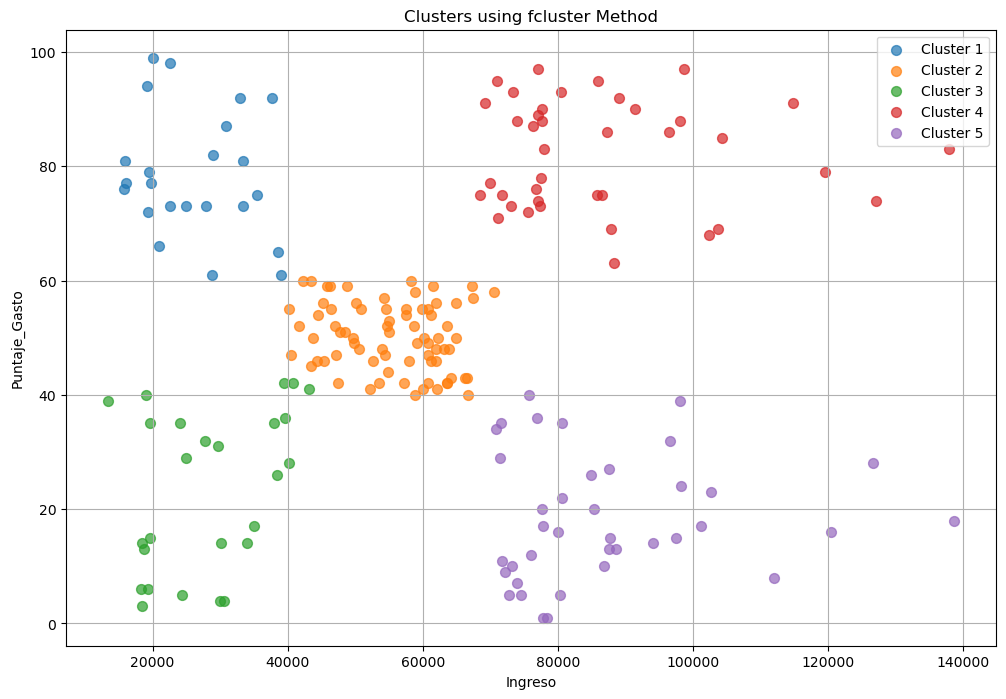

In [206]:
# Plot the clusters
plot_clusters_fcluster(Ing_Gas, cluster_labels)

In [207]:
# Implementacion manual

def find_clusters_manually(Z, threshold):
    # Number of original observations
    n = Z.shape[0] + 1
    clusters = {i: [i] for i in range(n)}
    
    for i, row in enumerate(Z):
        # Get cluster indices being merged and the merge distance
        c1, c2, dist, _ = row
        
        # Check merge distance against threshold
        if dist > threshold:
            break
        
        # Merge the clusters at indices c1 and c2
        c1, c2 = int(c1), int(c2)
        clusters[n + i] = clusters.pop(c1) + clusters.pop(c2)

    # formed clusters
    formed_clusters = [set(cluster) for cluster in clusters.values()]
    labels = np.zeros(n, dtype=int)
    for label, cluster in enumerate(formed_clusters):
        for index in cluster:
            labels[index] = label + 1
    return formed_clusters, labels

In [208]:
# Get the clusters formed by distance
formed_clusters, manual_labels = find_clusters_manually(Z_Ing_Gas_sc, distance)
num_clusters = len(formed_clusters)

print(f"Number of clusters formed at distance {distance}: {num_clusters}")

# print cluster contents
for i, cluster in enumerate(formed_clusters, 1):
    print(f"Tamaño Cluster {i}: {len(cluster)}")
    print(f"Cluster {i}: {sorted(cluster)}")

Number of clusters formed at distance 6: 5
Tamaño Cluster 1: 23
Cluster 1: [1, 5, 9, 11, 15, 52, 55, 71, 90, 96, 101, 113, 128, 133, 136, 149, 154, 167, 176, 178, 185, 195, 198]
Tamaño Cluster 2: 74
Cluster 2: [2, 3, 4, 7, 12, 19, 20, 22, 24, 25, 26, 30, 31, 33, 34, 35, 39, 45, 47, 54, 65, 68, 72, 74, 75, 76, 79, 83, 84, 85, 88, 89, 91, 95, 99, 100, 102, 103, 104, 106, 109, 110, 115, 116, 117, 118, 122, 123, 125, 127, 129, 137, 140, 141, 142, 145, 146, 148, 150, 151, 155, 156, 162, 165, 166, 168, 169, 170, 172, 174, 183, 184, 186, 196]
Tamaño Cluster 3: 26
Cluster 3: [21, 29, 36, 40, 42, 44, 64, 66, 73, 98, 105, 112, 121, 124, 135, 139, 153, 160, 161, 177, 180, 181, 187, 192, 194, 197]
Tamaño Cluster 4: 39
Cluster 4: [6, 8, 14, 17, 28, 32, 43, 49, 50, 57, 58, 59, 60, 61, 63, 69, 70, 77, 80, 87, 93, 94, 114, 119, 130, 132, 134, 143, 147, 157, 158, 159, 163, 164, 171, 173, 175, 189, 199]
Tamaño Cluster 5: 38
Cluster 5: [0, 10, 13, 16, 18, 23, 27, 37, 38, 41, 46, 48, 51, 53, 56, 62, 67, 7

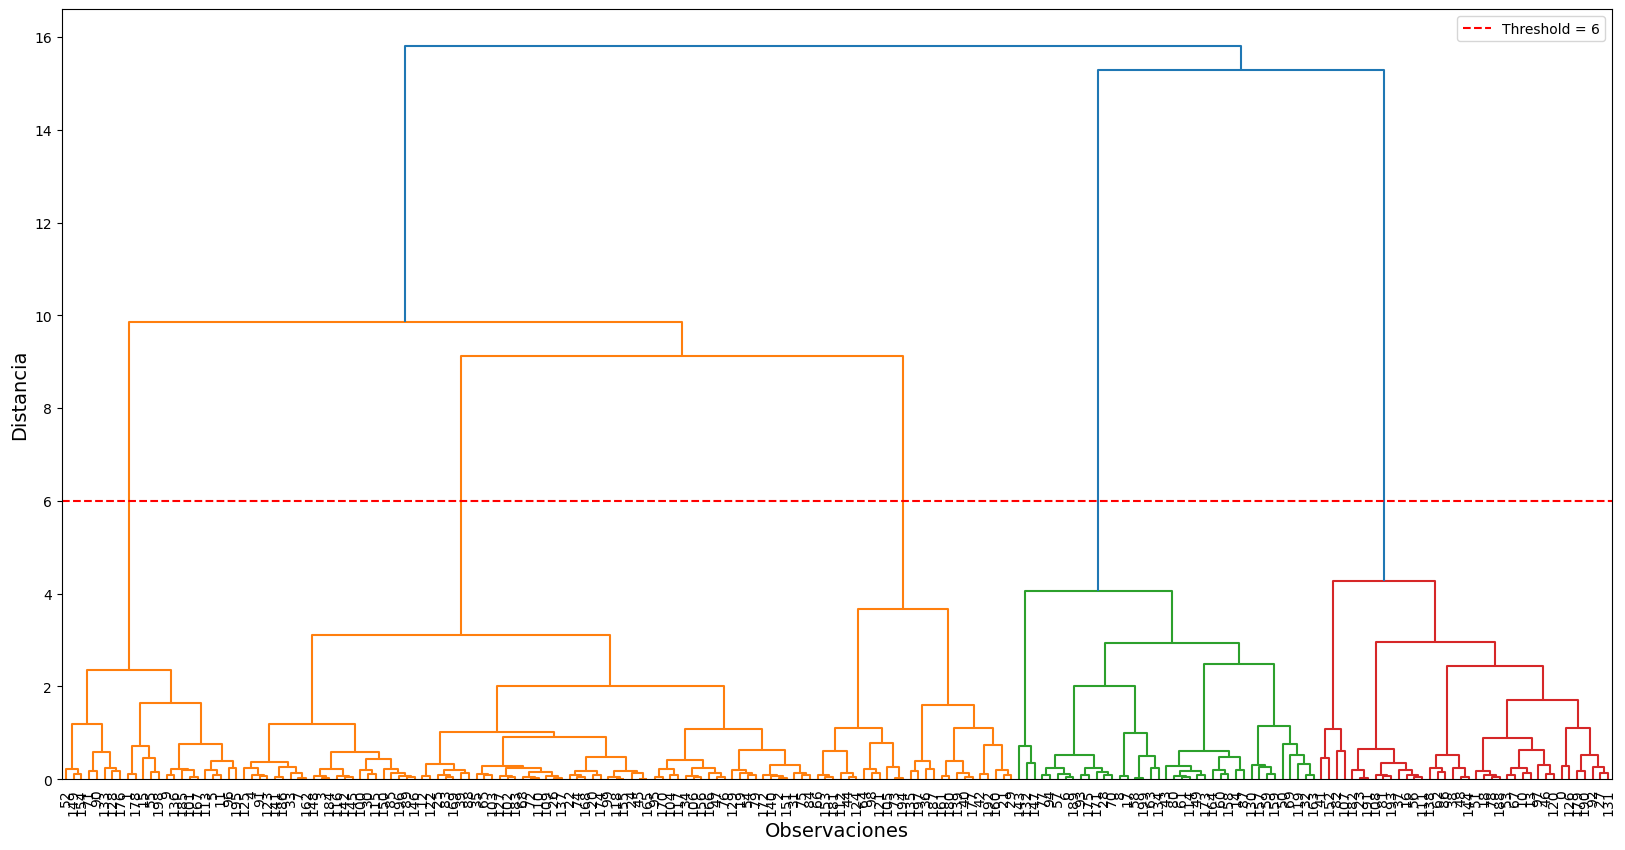

In [209]:
# Plot the dendrogram and threshold
fig, ax = plt.subplots(figsize=(20, 10))
dendrogram(Z_Ing_Gas_sc, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=10, ax=ax)
ax.axhline(y=distance, color='r', linestyle='--', label=f'Threshold = {distance}')
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_ylabel('Distancia', fontsize=14)
plt.legend()
plt.show()

In [210]:
# Plotting clusters formed using the manual clustering 
def plot_clusters_manual(df, cluster_labels):
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        plt.scatter(
            df.loc[cluster_labels == cluster, 'Ingreso'],
            df.loc[cluster_labels == cluster, 'Puntaje_Gasto'],
            label=f'Cluster {cluster}',
            s=50, alpha=0.7
        )
    plt.title('Clusters Manual Clustering Method')
    plt.xlabel('Ingreso')
    plt.ylabel('Puntaje_Gasto')
    plt.legend()
    plt.grid(True)
    plt.show()

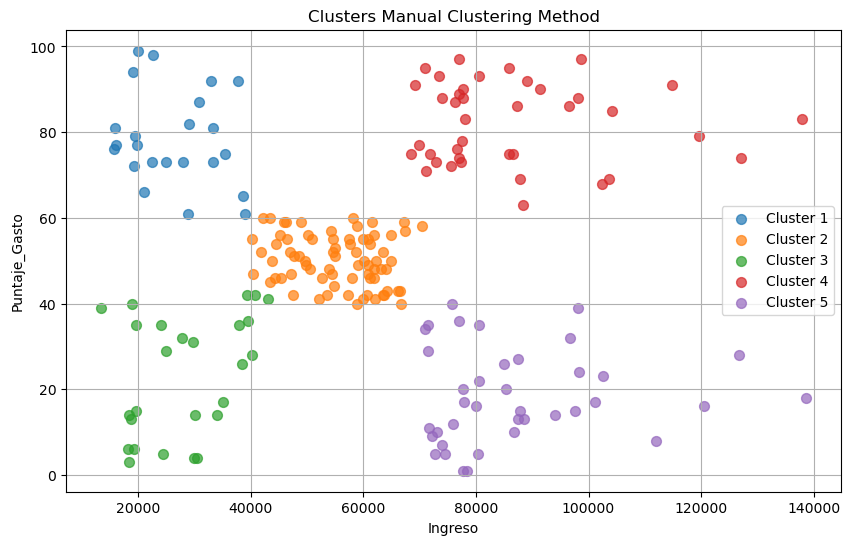

In [211]:
plot_clusters_manual(Ing_Gas, manual_labels)

(Utilice este espacio para describir su procedimiento)

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

In [212]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import AgglomerativeClustering

cluster_AggC = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_AggC.fit_predict(Ing_Gas_scaled)

In [213]:
# Plotting clusters
def plot_clusters_aggc(df, cluster_labels):
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        plt.scatter(
            df.loc[cluster_labels == cluster, 'Ingreso'],
            df.loc[cluster_labels == cluster, 'Puntaje_Gasto'],
            label=f'Cluster {cluster}',
            s=50, alpha=0.7
        )
    plt.title('Clusters  using Agglomerative Clustering')
    plt.xlabel('Ingreso')
    plt.ylabel('Puntaje_Gasto')
    plt.legend()
    plt.grid(True)
    plt.show()

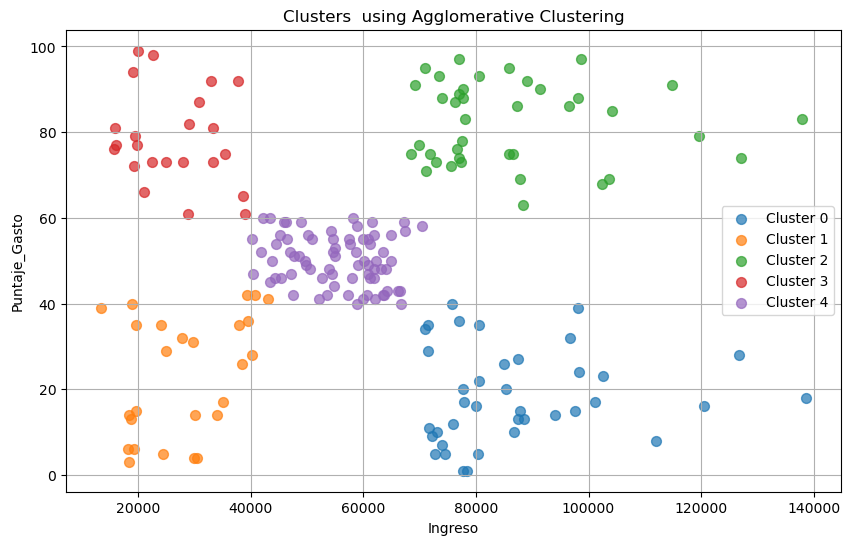

In [214]:
# Plot the clusters
plot_clusters_aggc(Ing_Gas, cluster_labels)

(Utilice este espacio para describir su procedimiento)

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [215]:
# Utilice este espacio para escribir el código

In [216]:
# Busqueda de epsilon y min_scamples
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def find_knee_points(data, n_neighbors_list):
    knee_values = []
    
    plt.figure(figsize=(10, 6), dpi=100)
    
    for n in n_neighbors_list:
        neigh = NearestNeighbors(n_neighbors=n)
        nbrs = neigh.fit(data)
        distancias, indices = nbrs.kneighbors(data)
        distancias = np.sort(distancias.flatten())
        
        # Calculo de rodilla
        i = np.arange(len(distancias))
        knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        knee_value = distancias[knee.knee]
        knee_values.append(knee_value)
        
        # Generate a color for the line
        line_color = next(plt.gca()._get_lines.prop_cycler)['color']
        
        plt.plot(distancias, label=f'n_neighbors = {n}', color=line_color)
        plt.axhline(y=knee_value, color=line_color, linestyle='--', label=f'Knee at {n} = {knee_value:.2f}')
    
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Knee Point Analysis for Different n_neighbors')
    plt.legend()
    plt.show()
    
    return knee_values

In [288]:
# Busqueda de epsilon y min_scamples con metrica #### Me falta probar que no se haya despiporrado antes de punto 5
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def find_knee_points(data, n_neighbors_list, metric = 'minkowski'):
    knee_values = []
    
    plt.figure(figsize=(10, 6), dpi=100)
    
    for n in n_neighbors_list:
        neigh = NearestNeighbors(n_neighbors=n, metric = metric)
        nbrs = neigh.fit(data)
        distancias, indices = nbrs.kneighbors(data)
        distancias = np.sort(distancias.flatten())
        
        # Calculo de rodilla
        i = np.arange(len(distancias))
        knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        knee_value = distancias[knee.knee]
        knee_values.append(knee_value)
        
        # Generate a color for the line
        line_color = next(plt.gca()._get_lines.prop_cycler)['color']
        
        plt.plot(distancias, label=f'n_neighbors = {n}', color=line_color)
        plt.axhline(y=knee_value, color=line_color, linestyle='--', label=f'Knee at {n} = {knee_value:.2f}')
    
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Knee Point Analysis for Different n_neighbors')
    plt.legend()
    plt.show()
    
    return knee_values

In [217]:
# DBscan para diferentes epsilons y min_samples
def plot_dbscan_across_epsilons(data, epsilon_list, min_samples_list):
    fig, axes = plt.subplots(len(epsilon_list), len(min_samples_list), figsize=(15, len(epsilon_list) * 5), dpi=100)
    
    for i, e in enumerate(epsilon_list):        
        for j, n in enumerate(min_samples_list):
            # Apply DBSCAN with the current epsilon and min_samples
            db = DBSCAN(eps=e, min_samples=n).fit(data)
            cluster_labels = db.labels_
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            
            # Assign clusters to the dataframe
            resultado = pd.DataFrame(data).assign(Cluster=cluster_labels)
            
            # Plot the clusters
            ax = axes[i, j] if len(epsilon_list) > 1 else axes[j]
            for k in np.unique(cluster_labels):
                if k != -1:
                    ax.scatter(
                        x=resultado.loc[resultado.Cluster == k, 0], 
                        y=resultado.loc[resultado.Cluster == k, 1]
                    )
                else:
                    ax.scatter(
                        x=resultado.loc[resultado.Cluster == k, 0], 
                        y=resultado.loc[resultado.Cluster == k, 1],
                        c="black"
                    )
            ax.set_title(f'eps = {e:.2f}: {n_clusters} clusters, min_samples={n}')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

In [225]:
# Second implementation
# DBSCAN across different epsilons and min_samples
def plot_dbscan_across_epsilons(data, epsilon_list, min_samples_list, metric='euclidean'):
    fig, axes = plt.subplots(len(epsilon_list), len(min_samples_list), figsize=(15, len(epsilon_list) * 5), dpi=100)
    
    for i, e in enumerate(epsilon_list):        
        for j, n in enumerate(min_samples_list):
            # Apply DBSCAN with the current epsilon and min_samples
            db = DBSCAN(eps=e, min_samples=n, metric=metric).fit(data)
            cluster_labels = db.labels_
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            
            # Assign clusters to the DataFrame
            resultado = pd.DataFrame(data).assign(Cluster=cluster_labels)
            
            # Plot the clusters
            ax = axes[i, j] if len(epsilon_list) > 1 else axes[j]
            for k in np.unique(cluster_labels):
                if k != -1:
                    mask = resultado.Cluster == k
                    ax.scatter(
                        x=resultado.iloc[mask.values, 0], 
                        y=resultado.iloc[mask.values, 1]
                    )
                else:
                    mask = resultado.Cluster == k
                    ax.scatter(
                        x=resultado.iloc[mask.values, 0], 
                        y=resultado.iloc[mask.values, 1],
                        c="black"
                    )
            ax.set_title(f'eps = {e:.2f}: {n_clusters} clusters, min_samples={n}')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

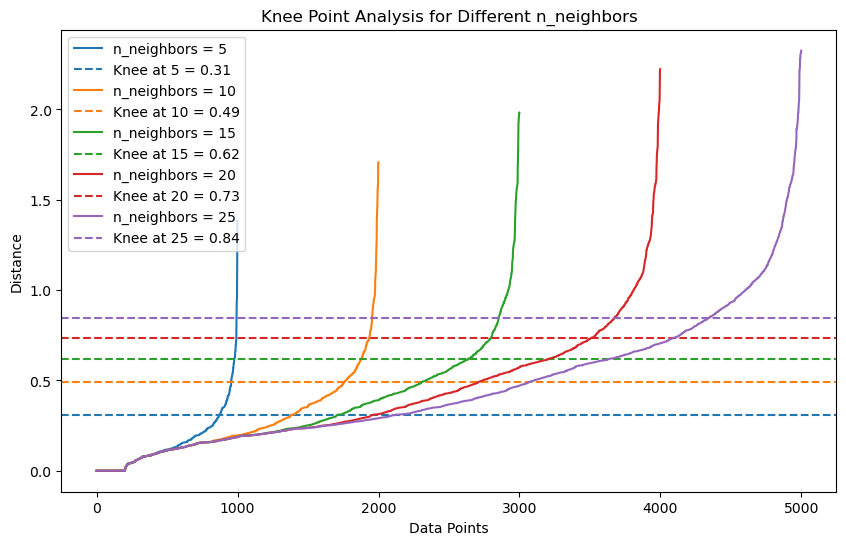

Puntos de rodilla encontrados para diferentes numeros de vecinos:
 [0.3101533404590082, 0.4934968313866966, 0.6212764621186658, 0.7332899728300047, 0.844705558387034]


In [266]:
n_neighbors_list = [5, 10, 15, 20, 25]  
epsilon_list = find_knee_points(Ing_Gas_scaled, n_neighbors_list)
print('Puntos de rodilla encontrados para diferentes numeros de vecinos:\n', epsilon_list)

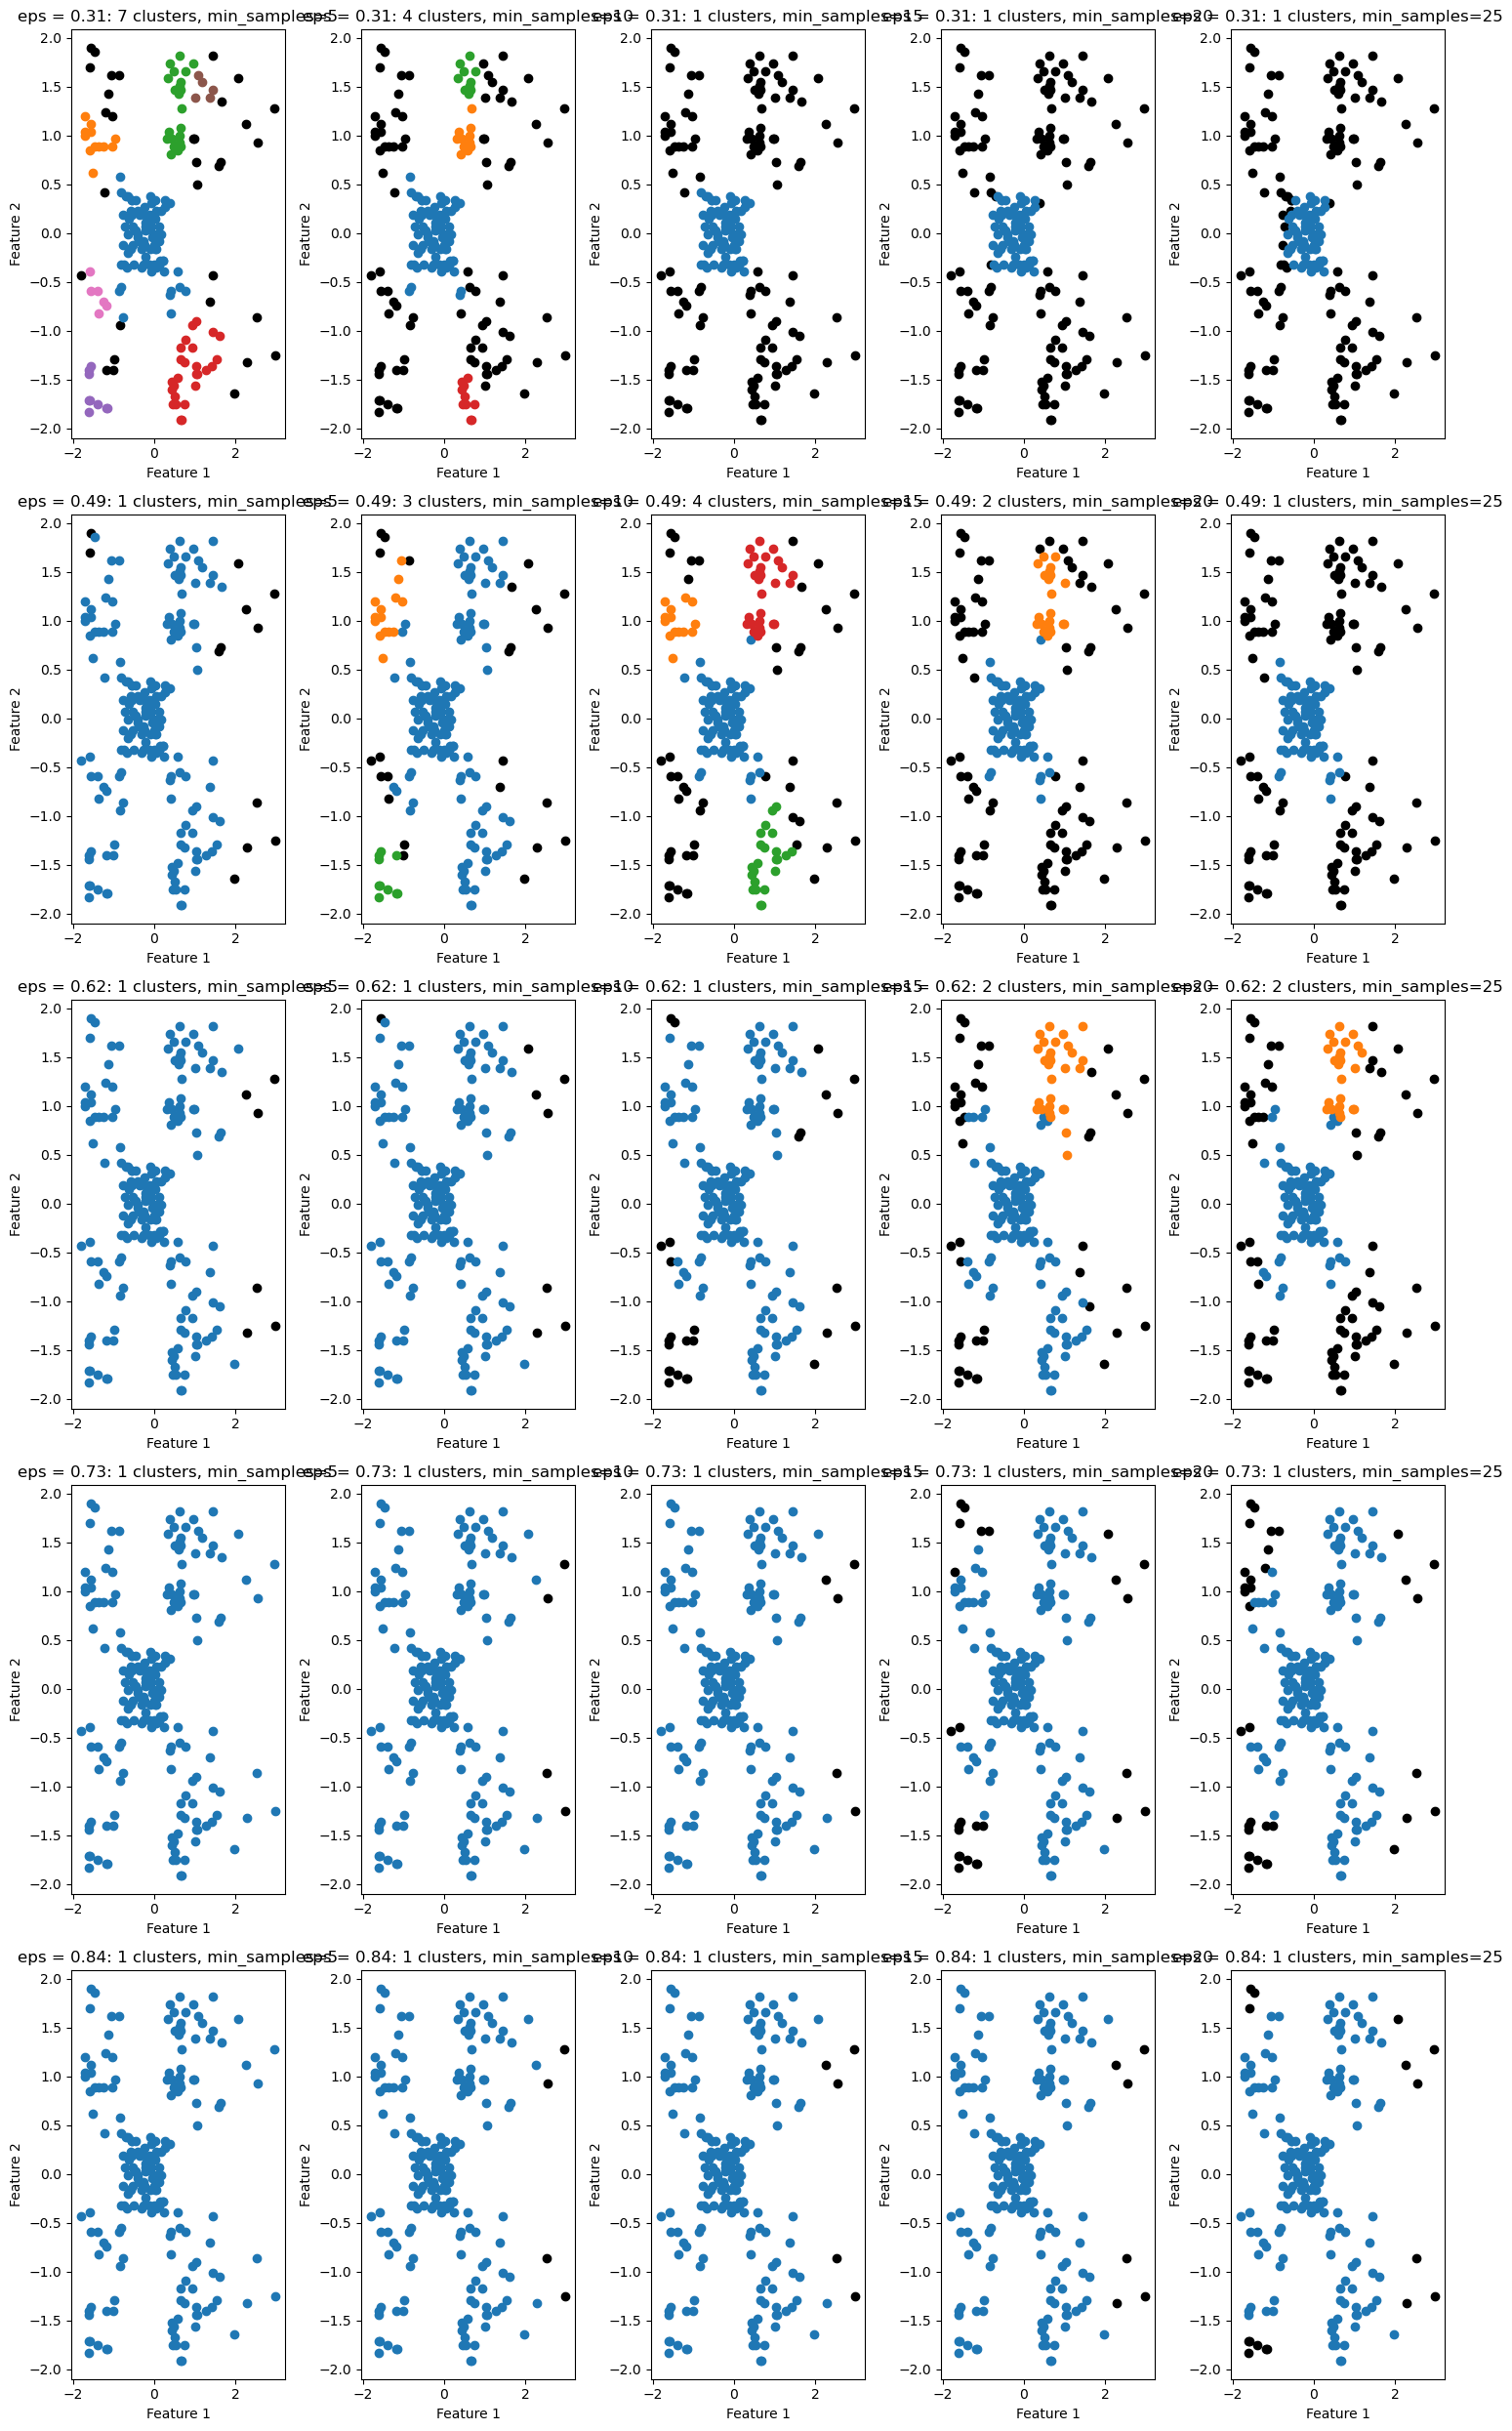

In [267]:
# Valores Originales encontrados
#epsilon_list = [0.30, 0.5, 0.6,0.7,0.8]
min_samples_list = [5, 10, 15, 20, 25]  
plot_dbscan_across_epsilons(Ing_Gas_scaled, epsilon_list, min_samples_list)

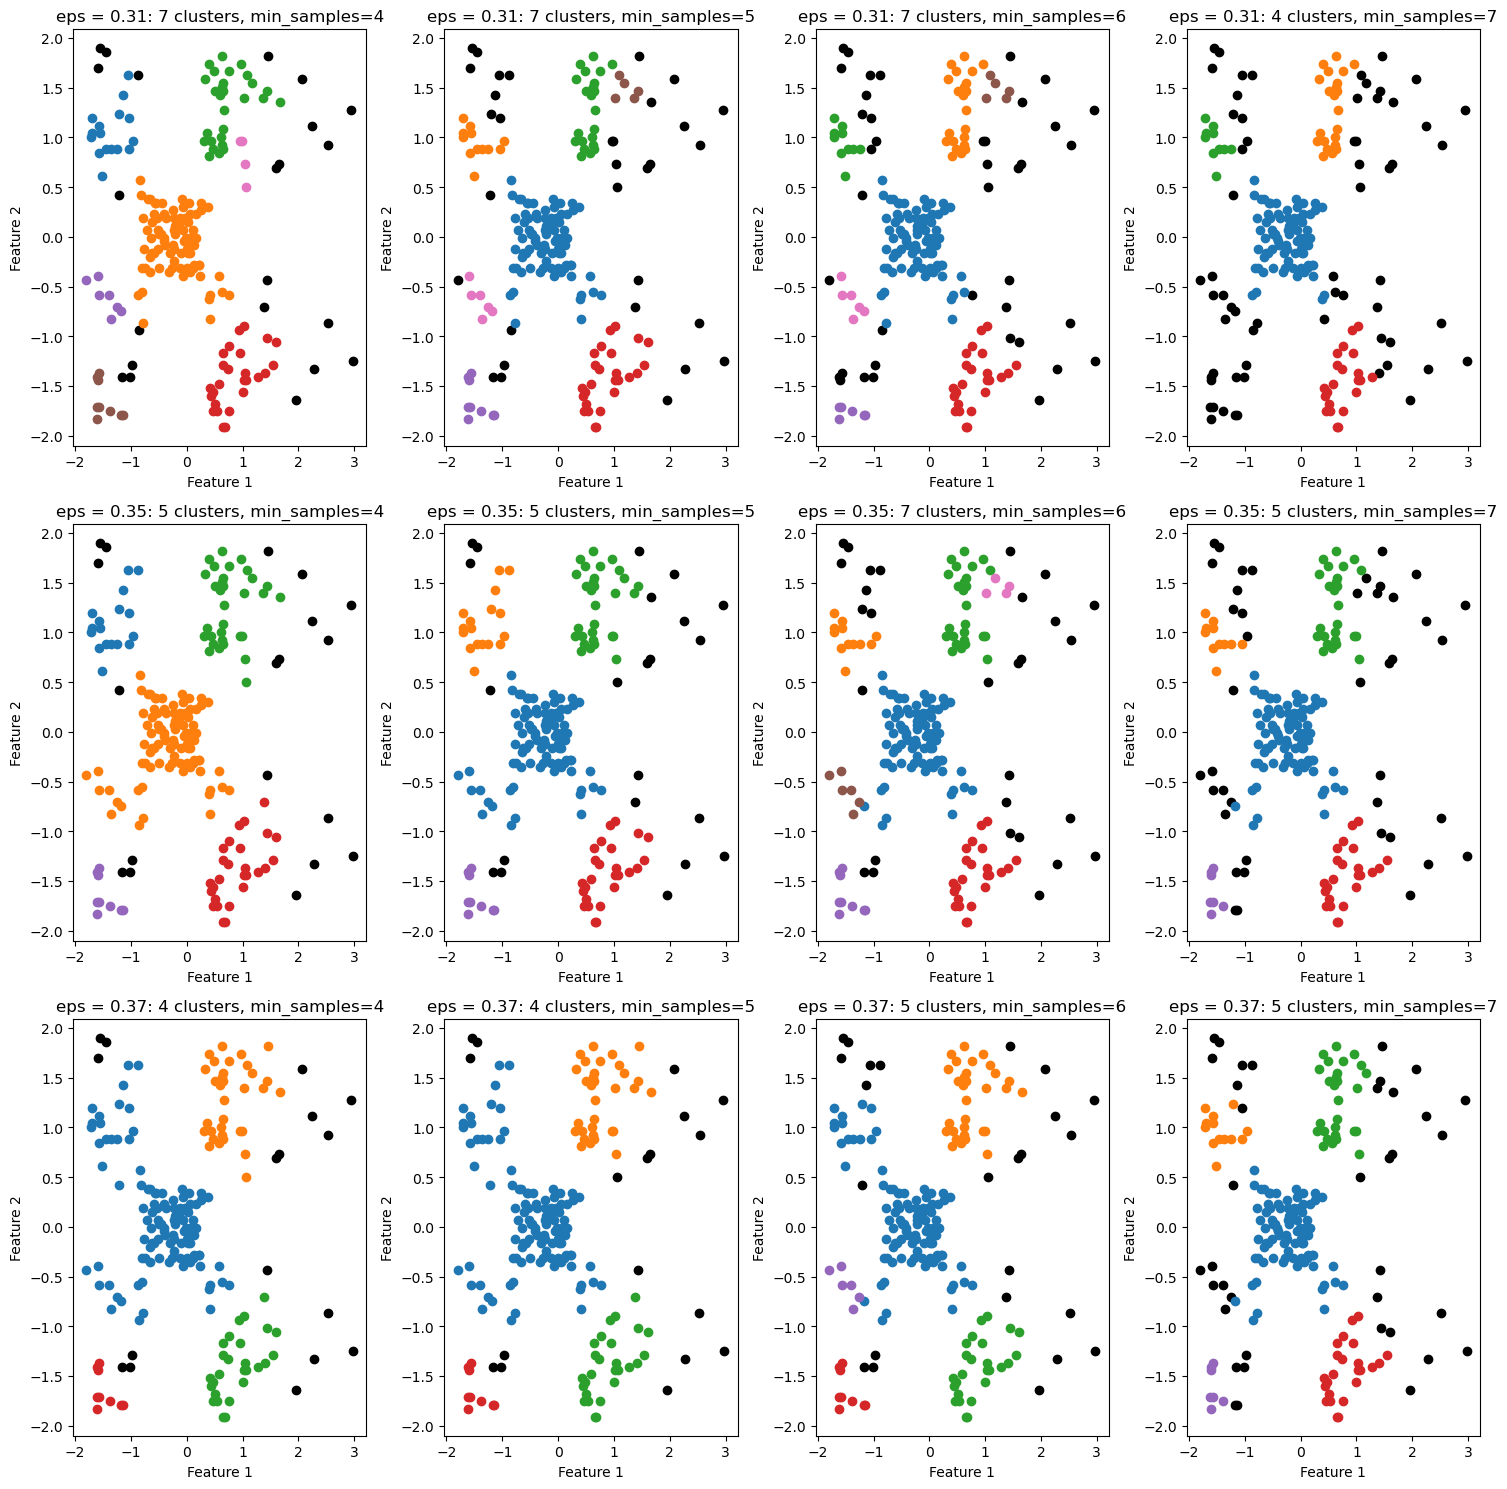

In [226]:
epsilon_list = [0.31, 0.35, 0.37]
min_samples_list = [4, 5, 6, 7]  
plot_dbscan_across_epsilons(Ing_Gas_scaled, epsilon_list, min_samples_list)

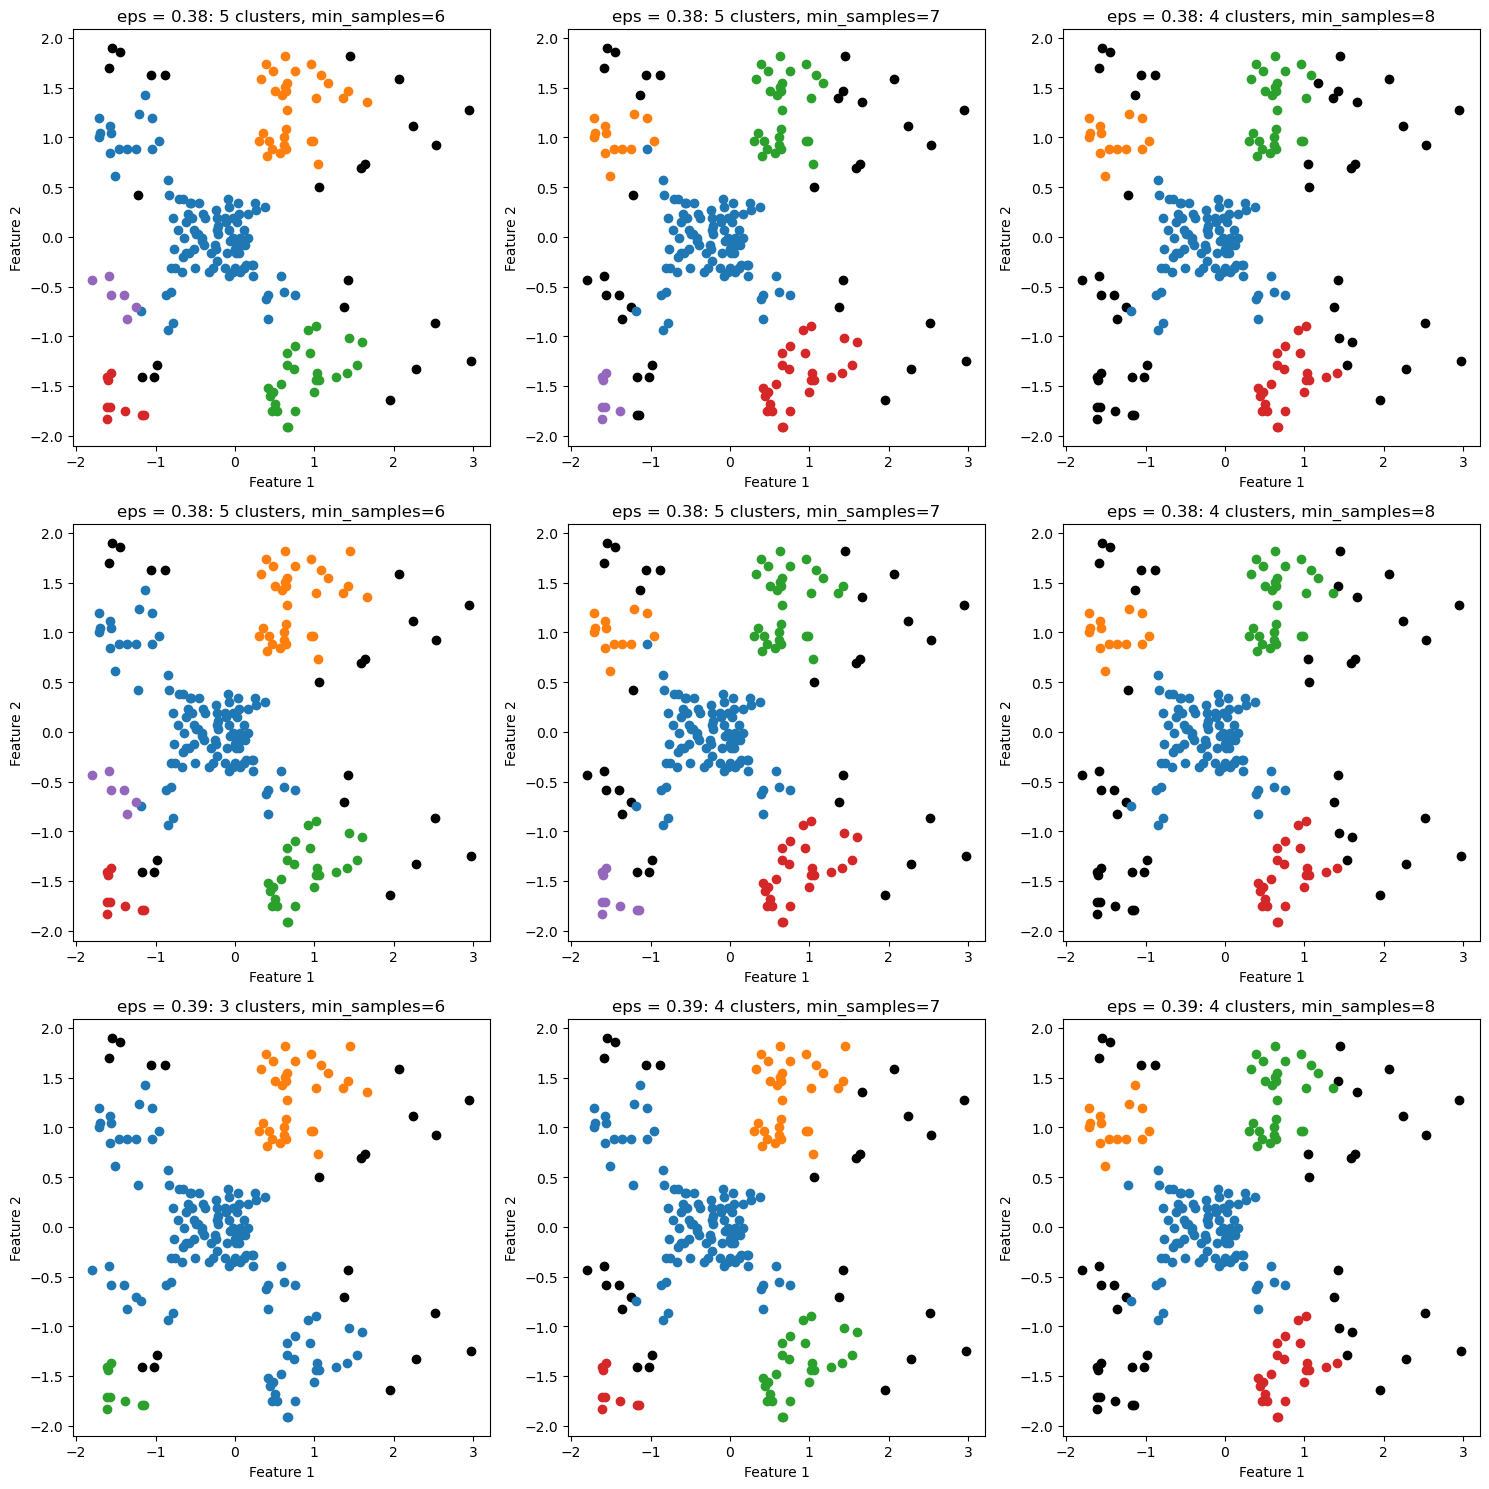

In [227]:
epsilon_list = [0.375, 0.38, 0.39]
min_samples_list = [6, 7, 8]  
plot_dbscan_across_epsilons(Ing_Gas_scaled, epsilon_list, min_samples_list)

(Utilice este espacio para describir su procedimiento)

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [283]:
# Utilice este espacio para escribir el código.
Gen_GrE = clientes[["Genero", "Grupo_Eta"]]
cl_red = pd.concat([Ing_Gas_scaled, Gen_GrE], axis=1)
cl_red.head()

,Ing_sc,Ptj_sc,Genero,Grupo_Eta
0,1.431094,-0.434801,Mujer,35-44
1,-0.960650,0.962775,Mujer,18-24
2,-0.028719,0.186343,Mujer,65+
3,-0.462474,0.031057,Hombre,55-64
4,-0.618133,0.147522,Mujer,25-34


In [284]:
cl_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Ing_sc     200 non-null    float64 
 1   Ptj_sc     200 non-null    float64 
 2   Genero     200 non-null    object  
 3   Grupo_Eta  200 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 5.2+ KB


In [285]:
cl_red = cl_red.apply(lambda x: x.astype(str) if not pd.api.types.is_numeric_dtype(x) else x)
cl_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ing_sc     200 non-null    float64
 1   Ptj_sc     200 non-null    float64
 2   Genero     200 non-null    object 
 3   Grupo_Eta  200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [248]:
# OJO ELIMINAR
# With dummies
cl_dum = pd.get_dummies(cl_red, dtype=float, drop_first = True)
cl_dum.head()

,Ing_sc,Ptj_sc,Genero_Mujer,Grupo_Eta_25-34,Grupo_Eta_35-44,Grupo_Eta_45-54,Grupo_Eta_55-64,Grupo_Eta_65+
0,1.431094,-0.434801,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.960650,0.962775,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.028719,0.186343,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.462474,0.031057,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.618133,0.147522,1.0,1.0,0.0,0.0,0.0,0.0


In [286]:
# Opcion 1 = No dummies
import gower
dist2 = gower.gower_matrix(cl_red)
dist_mat2 = pd.DataFrame(dist2)
dist_mat2

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.467024,0.367225,0.629724,0.395525,0.733005,0.381504,0.654588,0.582437,0.503569,...,0.299865,0.386479,0.152487,0.637416,0.724295,0.491610,0.374453,0.408111,0.435238,0.114951
1,0.467024,0.000000,0.349799,0.587300,0.321499,0.526185,0.335520,0.312435,0.651502,0.036545,...,0.516888,0.774423,0.380864,0.503077,0.690945,0.289892,0.342571,0.624760,0.031786,0.352072
2,0.367225,0.349799,0.000000,0.532907,0.283402,0.615780,0.332659,0.537363,0.618029,0.386344,...,0.417090,0.674624,0.366894,0.653278,0.688703,0.374385,0.308248,0.622518,0.318013,0.354314
3,0.629724,0.587300,0.532907,0.000000,0.515800,0.353281,0.615567,0.274864,0.400937,0.623845,...,0.679589,0.437123,0.583987,0.415777,0.405795,0.611886,0.525341,0.339611,0.555514,0.637222
4,0.395525,0.321499,0.283402,0.515800,0.000000,0.337481,0.116061,0.516446,0.401431,0.358044,...,0.195389,0.702924,0.333493,0.681578,0.655301,0.096085,0.274847,0.589117,0.289713,0.387716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.491610,0.289892,0.374385,0.611886,0.096085,0.263707,0.120310,0.587022,0.426088,0.263551,...,0.291475,0.799009,0.405450,0.777663,0.695887,0.000000,0.367157,0.603908,0.306372,0.391965
196,0.374453,0.342571,0.308248,0.525341,0.274847,0.608552,0.390908,0.541293,0.676278,0.379116,...,0.424318,0.681852,0.308646,0.660506,0.380454,0.367157,0.000000,0.564270,0.310785,0.412563
197,0.408111,0.624760,0.622518,0.339611,0.589117,0.348575,0.705178,0.355563,0.490548,0.615867,...,0.687567,0.195101,0.301542,0.423755,0.341979,0.603908,0.564270,0.000000,0.605526,0.476833
198,0.435238,0.031786,0.318013,0.555514,0.289713,0.547767,0.349652,0.280649,0.635022,0.068331,...,0.485102,0.742637,0.349902,0.471291,0.671710,0.306372,0.310785,0.605526,0.000000,0.371307


In [289]:
dist2

array([[0.   , 0.467, 0.367, ..., 0.408, 0.435, 0.115],
       [0.467, 0.   , 0.35 , ..., 0.625, 0.032, 0.352],
       [0.367, 0.35 , 0.   , ..., 0.623, 0.318, 0.354],
       ...,
       [0.408, 0.625, 0.623, ..., 0.   , 0.606, 0.477],
       [0.435, 0.032, 0.318, ..., 0.606, 0.   , 0.371],
       [0.115, 0.352, 0.354, ..., 0.477, 0.371, 0.   ]], dtype=float32)

In [249]:
# OJO Eliminar
# Opcion 2 = dummies
import gower
dist_dum = gower.gower_matrix(cl_dum)
dist_mat_dum = pd.DataFrame(dist_dum)
dist_mat_dum

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.233512,0.308612,0.439862,0.322762,0.491503,0.315752,0.327294,0.416219,0.251785,...,0.274932,0.193239,0.076243,0.318708,0.487148,0.370805,0.312227,0.204055,0.217619,0.057476
1,0.233512,0.000000,0.174899,0.293650,0.160750,0.263093,0.167760,0.156218,0.325751,0.018273,...,0.258444,0.387211,0.190432,0.251538,0.345472,0.144946,0.171285,0.312380,0.015893,0.176036
2,0.308612,0.174899,0.000000,0.391454,0.266701,0.432890,0.291330,0.268682,0.434015,0.193172,...,0.333545,0.462312,0.308447,0.326639,0.469351,0.312193,0.279124,0.436259,0.159006,0.302157
3,0.439862,0.293650,0.391454,0.000000,0.382900,0.301641,0.432783,0.137432,0.325468,0.311922,...,0.464794,0.343562,0.416994,0.207889,0.327898,0.430943,0.387671,0.294805,0.277757,0.443611
4,0.322762,0.160750,0.266701,0.382900,0.000000,0.168740,0.058031,0.258223,0.200716,0.179022,...,0.097695,0.476462,0.291746,0.340789,0.452650,0.048043,0.262423,0.419558,0.144857,0.318858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.370805,0.144946,0.312193,0.430943,0.048043,0.131853,0.060155,0.293511,0.213044,0.131776,...,0.145737,0.524505,0.327725,0.388832,0.472943,0.000000,0.308579,0.426954,0.153186,0.320982
196,0.312227,0.171285,0.279124,0.387671,0.262423,0.429276,0.320454,0.270647,0.463139,0.189558,...,0.337159,0.465926,0.279323,0.330253,0.190227,0.308579,0.000000,0.407135,0.155392,0.331281
197,0.204055,0.312380,0.436259,0.294805,0.419558,0.299287,0.477589,0.177782,0.370274,0.307933,...,0.468783,0.097551,0.150771,0.211878,0.295989,0.426954,0.407135,0.000000,0.302763,0.238416
198,0.217619,0.015893,0.159006,0.277757,0.144857,0.273884,0.174826,0.140325,0.317511,0.034166,...,0.242551,0.371318,0.174951,0.235645,0.335855,0.153186,0.155392,0.302763,0.000000,0.185653


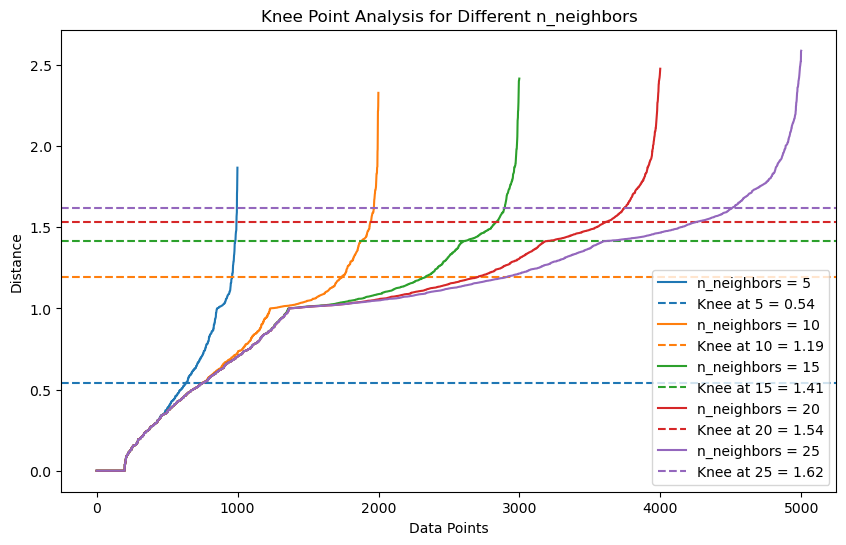

Puntos de rodilla encontrados para diferentes numeros de vecinos:
 [0.5405660574267294, 1.1917587224441561, 1.4148130272908104, 1.5354656661971446, 1.6170898099824924]


In [252]:
# LO QUE ME ESTABA DANDO CON DUMMIES IGNORAR
n_neighbors_list = [5, 10, 15, 20, 25]  
epsilon_list_dum = find_knee_points(cl_dum, n_neighbors_list)
print('Puntos de rodilla encontrados para diferentes numeros de vecinos:\n', epsilon_list_dum)

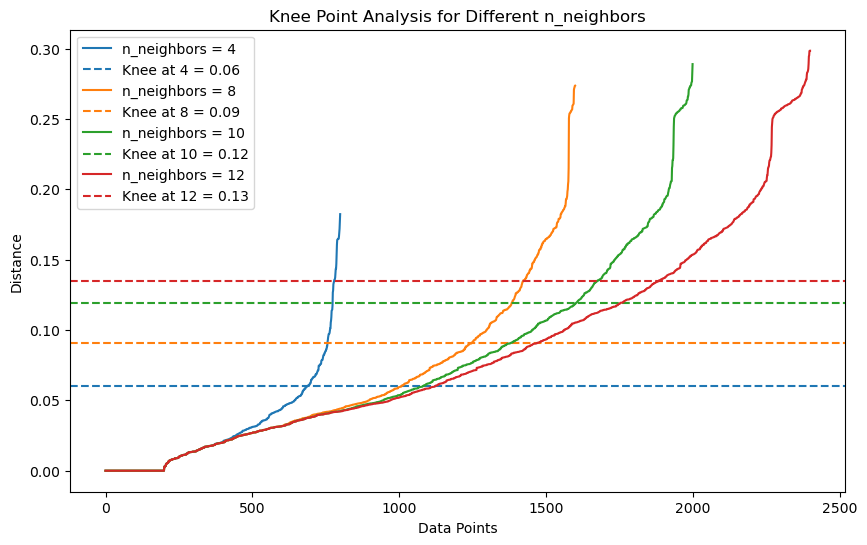

Puntos de rodilla encontrados para diferentes numeros de vecinos:
 [0.060497373, 0.09108741, 0.119333655, 0.13477156]


In [292]:
####  AQUI VOY #### OJO 
n_neighbors_list = [4, 8, 10, 12]  
epsilon_list_precomputed = find_knee_points(dist_mat2, n_neighbors_list, metric = 'precomputed')
print('Puntos de rodilla encontrados para diferentes numeros de vecinos:\n', epsilon_list_precomputed)

In [302]:
# AQUI TENGO UN PROBLEMA

e = 0.06
n = 4

In [299]:
### ojo function construction in progress
db1 = DBSCAN(eps=e, min_samples=n, metric = 'precomputed').fit(dist_mat2)
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
# Dataframe resultados
db1_df = pd.DataFrame(cl_dum).assign(Cluster=cluster_labels)
        

In [300]:
n_clusters

1

In [301]:
db1_df.groupby('Cluster').mean()

,Ing_sc,Ptj_sc,Genero_Mujer,Grupo_Eta_25-34,Grupo_Eta_35-44,Grupo_Eta_45-54,Grupo_Eta_55-64,Grupo_Eta_65+
Cluster,,,,,,,,
-1,2.585204,-0.020705,0.500000,0.500000,0.166667,0.333333,0.000000,0.000000
0,-0.079955,0.000640,0.561856,0.262887,0.211340,0.190722,0.082474,0.072165


In [262]:
# Implementation 3 
# DBSCAN across different epsilons and min_samples find # clusters > 1
def find_clusters_across_epsilons(data, epsilon_list, min_samples_list, metric='euclidean'):
    # Initialize a list to store DataFrames with clustering results
    resultados = []
    
    for i, e in enumerate(epsilon_list):        
        for j, n in enumerate(min_samples_list):
            # Apply DBSCAN with the current epsilon and min_samples
            db = DBSCAN(eps=e, min_samples=n, metric=metric).fit(data)
            cluster_labels = db.labels_
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            
            if n_clusters > 1:
                # Create a DataFrame with the data and the assigned clusters
                resultado = pd.DataFrame(data).assign(Cluster=cluster_labels)
                # Store the DataFrame in the list along with the current parameters
                resultados.append((e, n, resultado))
    
    return resultados

In [294]:
cluster_results = find_clusters_across_epsilons(dist_mat2, epsilon_list_precomputed, min_samples_list, metric = 'precomputed')

# Example: Accessing the results
for eps, min_samples, df in cluster_results:
    print(f"Epsilon: {eps}, Min Samples: {min_samples}")
    print(df.head()) 

Epsilon: 0.06049737334251404, Min Samples: 4
          0         1         2         3         4         5         6  \
0  0.000000  0.467024  0.367225  0.629724  0.395525  0.733005  0.381504   
1  0.467024  0.000000  0.349799  0.587300  0.321499  0.526185  0.335520   
2  0.367225  0.349799  0.000000  0.532907  0.283402  0.615780  0.332659   
3  0.629724  0.587300  0.532907  0.000000  0.515800  0.353281  0.615567   
4  0.395525  0.321499  0.283402  0.515800  0.000000  0.337481  0.116061   

          7         8         9  ...       191       192       193       194  \
0  0.654588  0.582437  0.503569  ...  0.386479  0.152487  0.637416  0.724295   
1  0.312435  0.651502  0.036545  ...  0.774423  0.380864  0.503077  0.690945   
2  0.537363  0.618029  0.386344  ...  0.674624  0.366894  0.653278  0.688703   
3  0.274864  0.400937  0.623845  ...  0.437123  0.583987  0.415777  0.405795   
4  0.516446  0.401431  0.358044  ...  0.702924  0.333493  0.681578  0.655301   

        195       196  

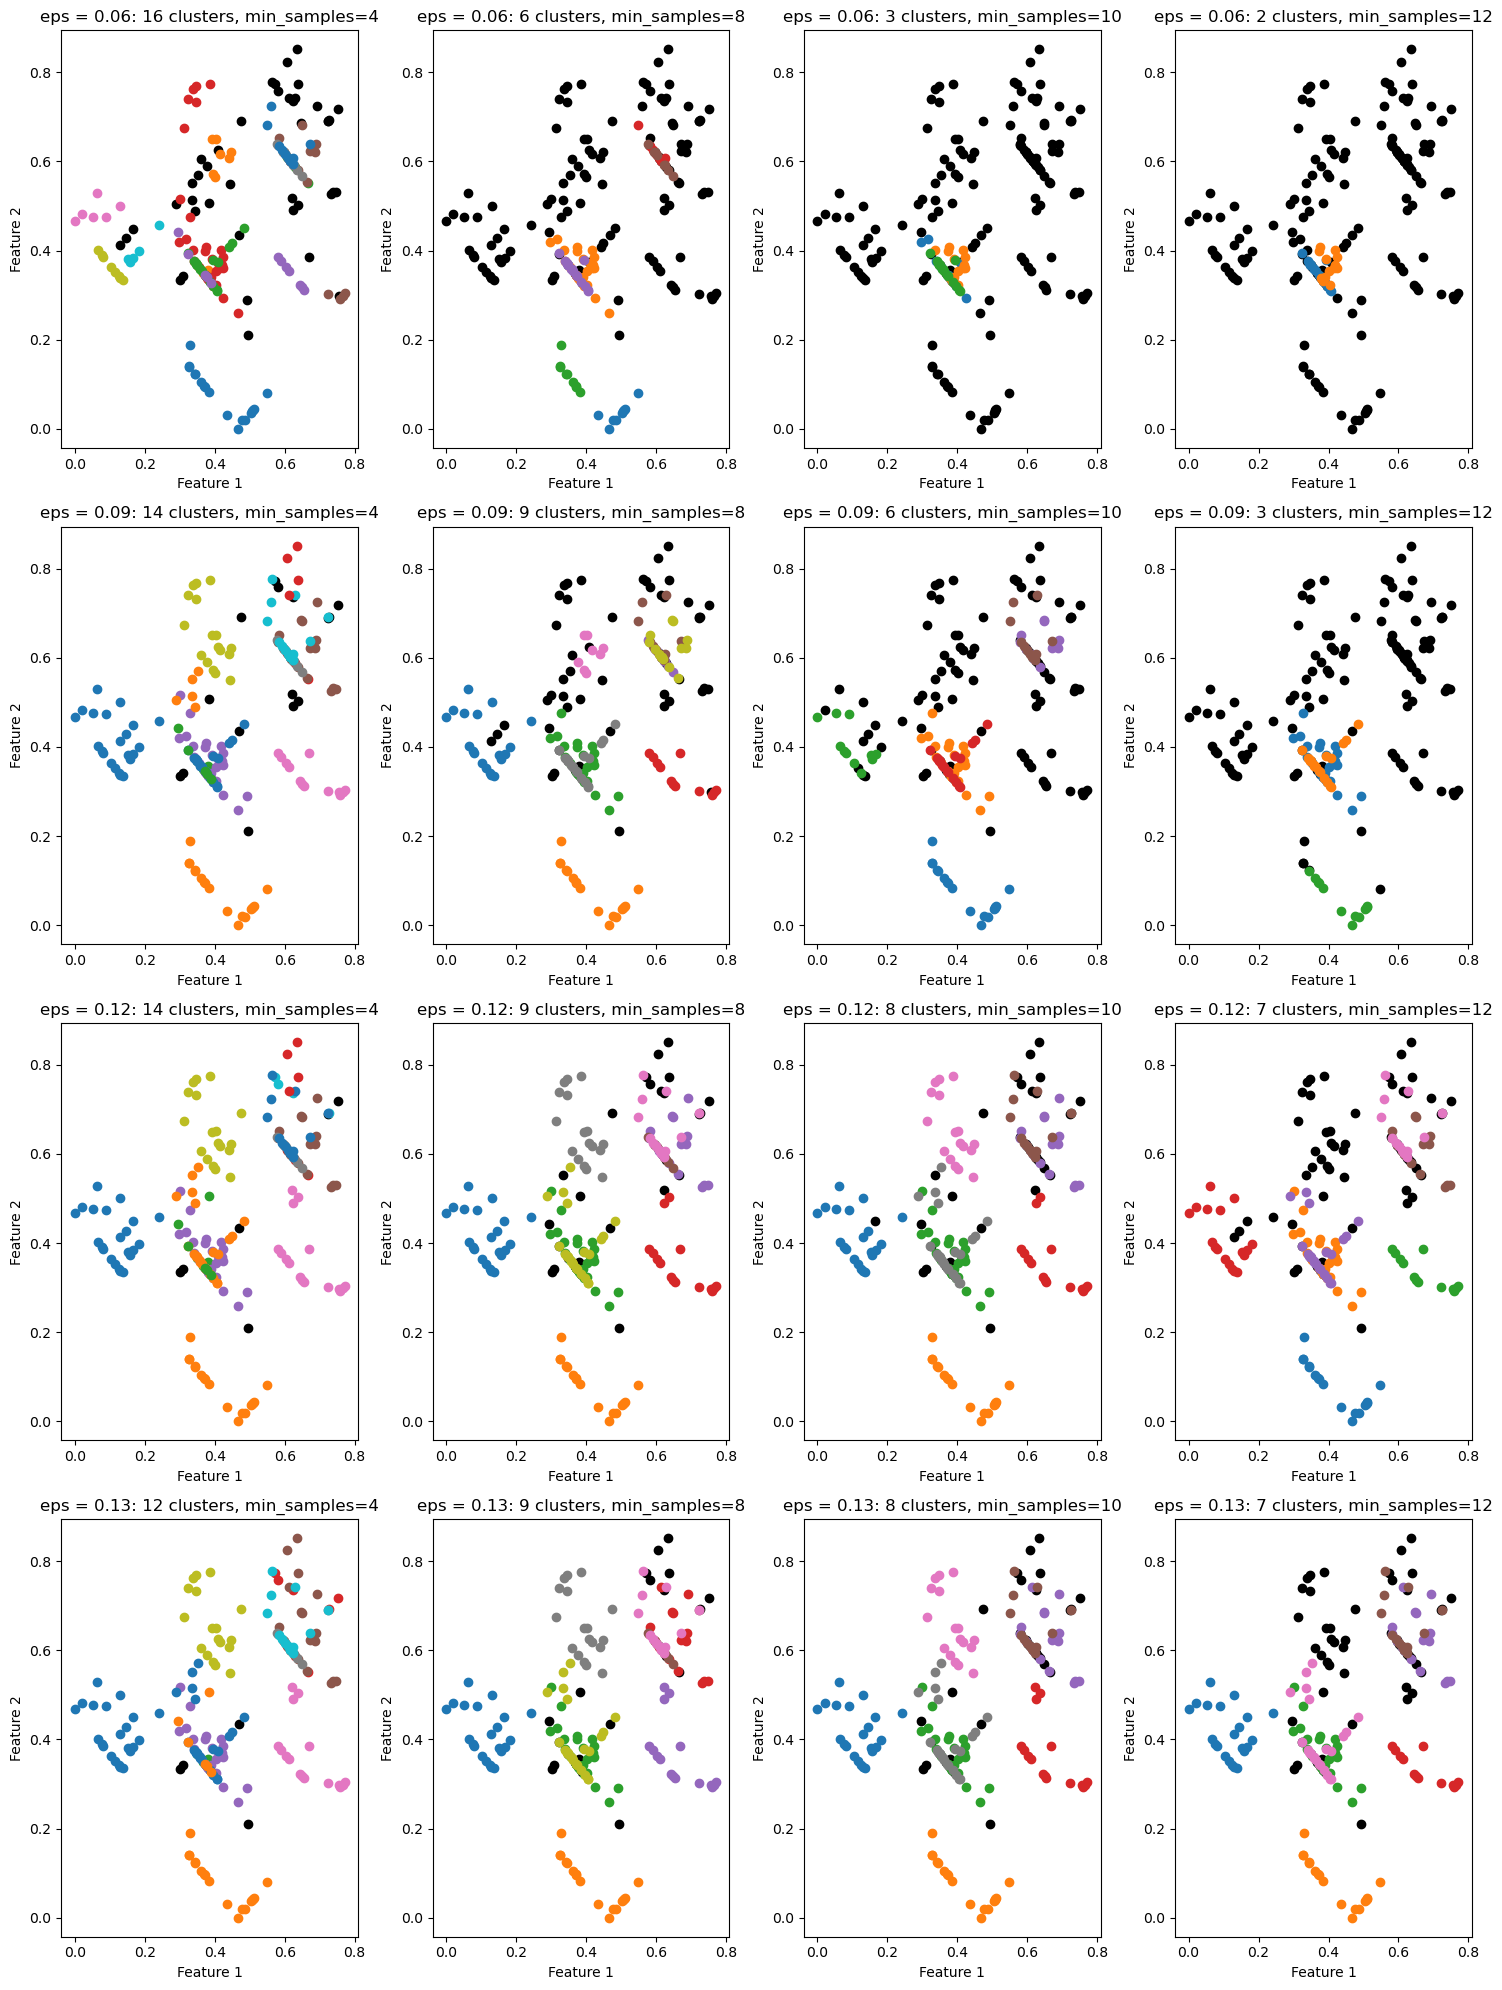

In [296]:

plot_dbscan_across_epsilons(dist_mat2, epsilon_list_precomputed, min_samples_list, metric = 'precomputed')

In [297]:
## Comparacion Matrices de Distancias  IGNORAR DE AQUI EN ADELANTE

In [233]:
from scipy.spatial import distance_matrix

# Creamos la matriz de distancias escogiendo p = 2, el cual convierte 
# la distancia Minkowski en la distancia euclideana
dist = distance_matrix(Ing_Gas_scaled, Ing_Gas_scaled, p = 2)

# Para visualizar mejor la matriz de distancia, la convertimos en un dataframe
dist_mat = pd.DataFrame(dist)
dist_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.770137,1.586467,1.950032,2.130360,3.090587,1.580132,2.125584,1.137362,3.336344,...,0.644752,1.657388,2.334912,1.637013,2.915394,3.269164,2.098259,2.830069,2.485974,1.465688
1,2.770137,0.000000,1.212988,1.056540,0.884282,0.410220,1.585620,0.745939,2.567748,0.605729,...,3.263814,3.306131,1.905552,3.067747,2.762711,0.626857,1.204291,1.612387,0.406311,1.950130
2,1.586467,1.212988,0.000000,0.460714,0.590691,1.506594,0.985270,0.541627,1.698126,1.754565,...,2.051570,2.211540,1.392740,2.002343,2.274528,1.682697,0.736160,1.571236,0.900055,1.280459
3,1.950032,1.056540,0.460714,0.000000,0.194406,1.241454,1.406686,0.322030,2.158520,1.492115,...,2.334897,2.250147,1.044537,2.011266,1.949251,1.380543,0.301684,1.120218,0.662181,1.725186
4,2.130360,0.884282,0.590691,0.194406,0.000000,1.048605,1.465254,0.206523,2.276638,1.298839,...,2.527064,2.430517,1.111172,2.187922,2.012180,1.186150,0.351250,1.071047,0.481578,1.802514


In [234]:
dist_mat.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.921928,1.756269,1.212118,1.250152,1.316531,1.939962,1.619583,1.329632,2.091025,2.137571,...,2.221040,2.282651,1.701386,2.110829,2.369247,2.069343,1.341724,1.866623,1.530117,1.800926
std,0.738922,0.877012,0.754430,0.809472,0.820954,0.939912,0.789781,0.807418,0.803105,0.977729,...,0.870918,0.948003,0.843582,0.917545,0.962681,0.961419,0.819671,0.901782,0.836188,0.816089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.432331,1.173666,0.524142,0.493115,0.623810,1.344031,1.099325,0.675213,1.603708,1.580902,...,1.778789,1.803295,1.088333,1.609340,1.866916,1.446141,0.663033,1.224277,0.902642,1.326108
50%,1.756051,1.553486,1.210613,1.240237,1.232069,1.773944,1.498729,1.246409,2.016730,2.005805,...,2.251226,2.228877,1.465676,2.023392,2.200479,1.939637,1.250661,1.630635,1.306029,1.726542
75%,2.282955,2.384326,1.805531,1.861444,1.954318,2.564412,2.223458,1.992589,2.572252,2.724918,...,2.731889,2.887692,2.287764,2.728210,3.028027,2.652957,1.918337,2.448678,2.164803,2.383313
max,3.783806,4.515863,3.330309,3.669284,3.856200,4.836217,3.548580,3.866336,4.077708,5.082634,...,4.319433,4.408107,4.393925,4.167898,5.116727,5.011977,3.892034,4.725095,4.230364,3.817408


In [274]:
# Compute statistics of the distance matrix
dist_stats = dist_mat.describe() # 2 variables

In [275]:
dist_stats_2 = dist_mat2.describe() # 4 variables ojo las distancias aqui son gower

In [276]:
dist_stats_dum = dist_mat_dum.describe()

In [277]:
def plot_distance_stats(dist_mat, dist_stats):
    """
    Plots statistics (mean, standard deviation, and maximum) of a distance matrix with subplots.

    Parameters:
    dist_mat (DataFrame): The distance matrix containing pairwise distances.
    dist_stats (DataFrame): The DataFrame containing the statistics (mean, std, min, max) of the distance matrix.
    """

    # Extract statistics
    mean_vals = dist_stats.loc['mean']
    std_vals = dist_stats.loc['std']
    min_vals = dist_stats.loc['min']
    max_vals = dist_stats.loc['max']

    # Calculate minimum non-zero and overall maximum values
    min_non_zero = dist_mat[dist_mat > 0].min().min()
    overall_max = dist_mat.max().max()

    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Plot Mean
    axes[0].plot(mean_vals, marker='o', linestyle='-', color='b')
    axes[0].axhline(y=min_non_zero, color='r', linestyle='--', label=f'Overall Min: {min_non_zero:.4f}')
    axes[0].axhline(y=overall_max, color='g', linestyle='--', label=f'Overall Max: {overall_max:.4f}')
    axes[0].set_title('Mean of Distance Matrix')
    axes[0].set_ylabel('Mean')
    axes[0].legend()
    axes[0].grid(True)

    # Plot Standard Deviation
    axes[1].plot(std_vals, marker='o', linestyle='-', color='g')
    axes[1].set_title('Standard Deviation of Distance Matrix')
    axes[1].set_ylabel('Standard Deviation')
    axes[1].grid(True)

    # Plot Maximum
    axes[2].plot(max_vals, marker='o', linestyle='-', color='m')
    axes[2].set_title('Maximum of Distance Matrix')
    axes[2].set_ylabel('Maximum')
    axes[2].set_xlabel('Index')
    axes[2].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

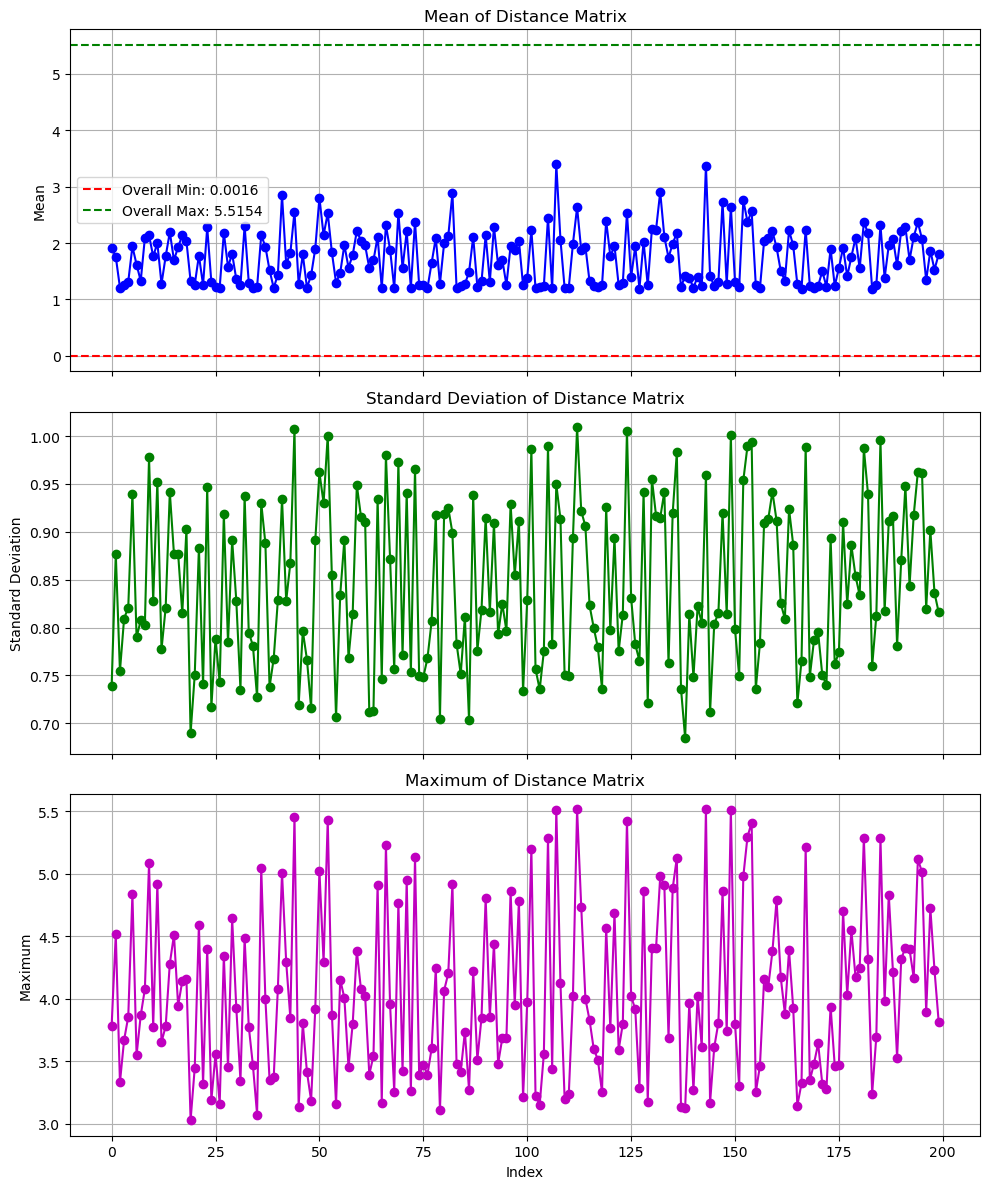

In [278]:
plot_distance_stats(dist_mat, dist_stats)

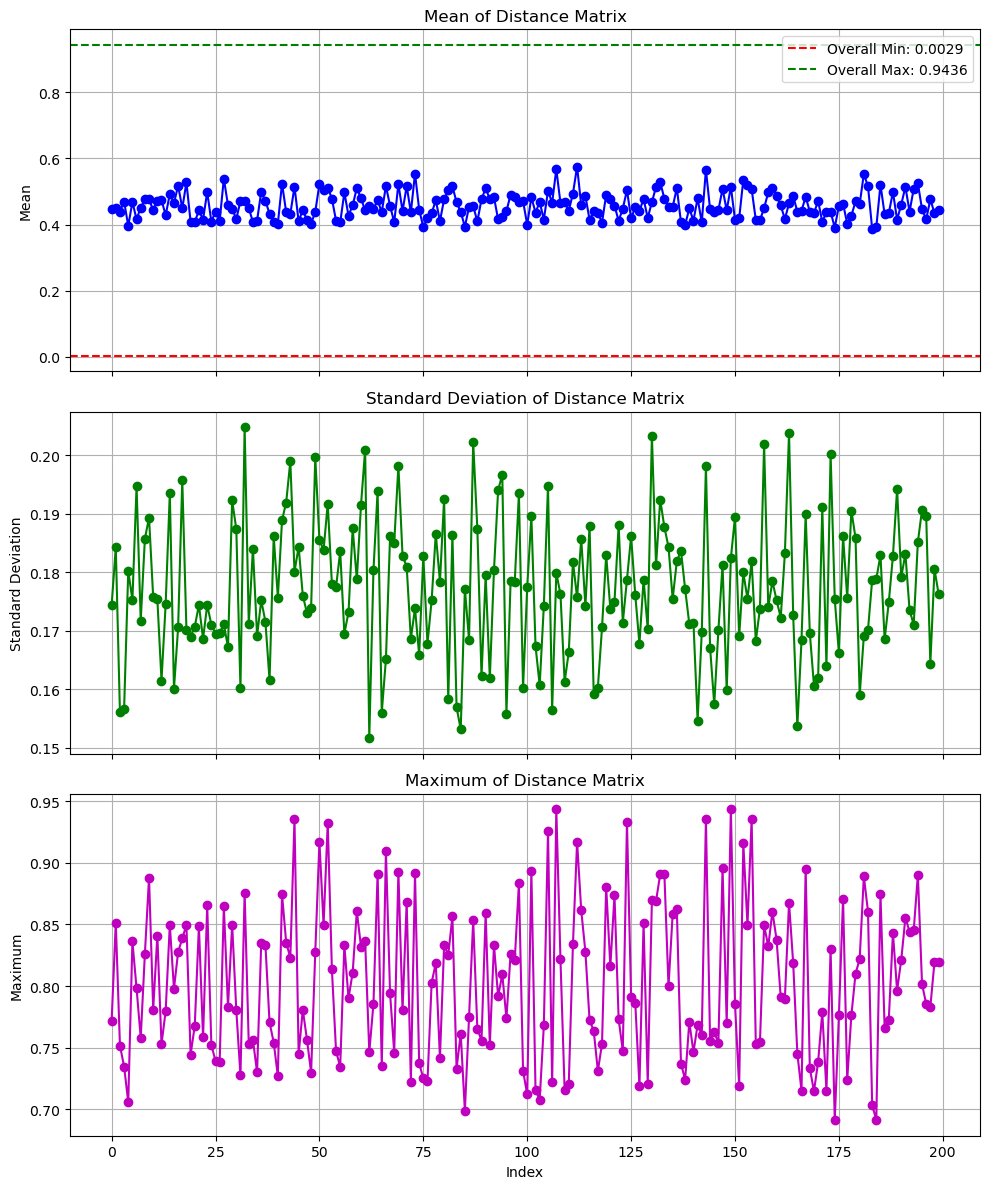

In [279]:
plot_distance_stats(dist_mat2, dist_stats_2)

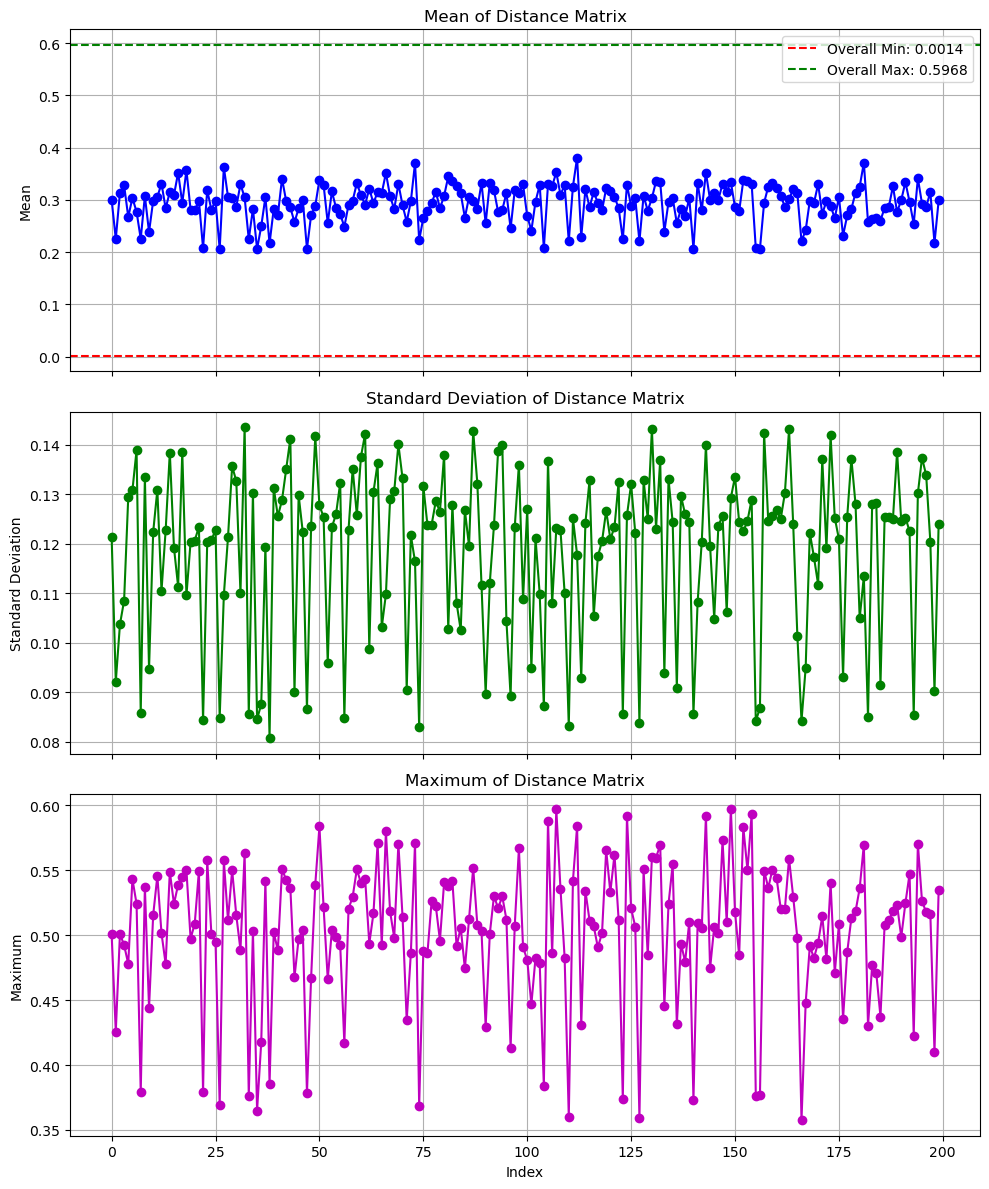

In [280]:
plot_distance_stats(dist_mat_dum, dist_stats_dum)

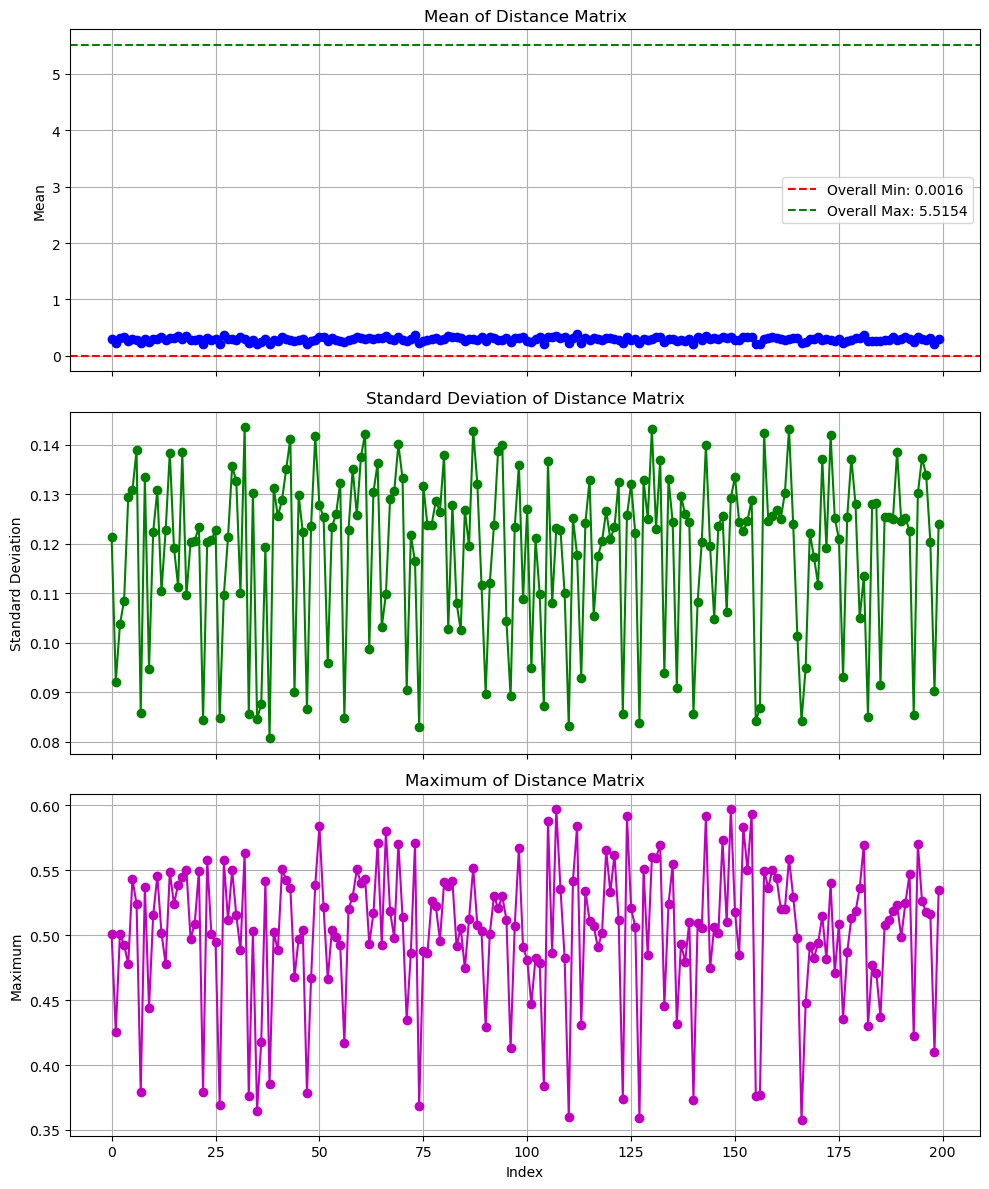

In [271]:
# Extract statistics
mean_vals = dist_stats.loc['mean']
std_vals = dist_stats.loc['std']
min_vals = dist_stats.loc['min']
max_vals = dist_stats.loc['max']

min_non_zero = dist_mat[dist_mat > 0].min().min()
overall_max = dist_mat.max().max()


# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Mean
axes[0].plot(mean_vals, marker='o', linestyle='-', color='b')
axes[0].axhline(y=min_non_zero, color='r', linestyle='--', label=f'Overall Min: {min_non_zero:.4f}')
axes[0].axhline(y=overall_max, color='g', linestyle='--', label=f'Overall Max: {overall_max:.4f}')
axes[0].set_title('Mean of Distance Matrix')
axes[0].set_ylabel('Mean')
axes[0].legend()
axes[0].grid(True)

# Plot Standard Deviation
axes[1].plot(std_vals, marker='o', linestyle='-', color='g')
axes[1].set_title('Standard Deviation of Distance Matrix')
axes[1].set_ylabel('Standard Deviation')
axes[1].grid(True)


# Plot Maximum
axes[2].plot(max_vals, marker='o', linestyle='-', color='m')
axes[2].set_title('Maximum of Distance Matrix')
axes[2].set_ylabel('Maximum')
axes[2].set_xlabel('Index')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

(Utilice este espacio para describir su procedimiento)